<a href="https://colab.research.google.com/github/gapv09/AEIOU/blob/main/Caf%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Modelo SARIMA para la producción de Café peruano


El café peruano es reconocido a nivel mundial por su calidad y diversidad de perfiles de sabor, resultado de las diversas condiciones geográficas y climáticas del país. Perú es uno de los mayores productores de café en América Latina y ocupa un lugar destacado a nivel global, con una producción centrada en la variedad arábica, que representa casi el 100% del café cultivado en el país.

**Zonas de Producción**

Las principales zonas productoras de café en Perú se encuentran en la vertiente oriental de los Andes, especialmente en regiones como Cajamarca, Junín, San Martín, Amazonas y Cusco. Estas áreas, con altitudes que varían entre los 800 y 2,000 metros sobre el nivel del mar, proporcionan condiciones ideales para el cultivo de café de especialidad, que es valorado por sus características distintivas de sabor y aroma.

**Características de la Producción**


*   Superficie cultivada: Perú cuenta con más de 400,000 hectáreas dedicadas al cultivo de café, involucrando a más de 220,000 familias en su producción.
*   Diversidad: Debido a las condiciones climáticas y geográficas, el café peruano tiene una gran diversidad de perfiles de sabor, que van desde notas afrutadas y florales hasta sabores achocolatados.
*   Producción orgánica: Perú es uno de los mayores exportadores de café orgánico en el mundo. Muchas fincas de café en el país operan con métodos sostenibles y están certificadas como orgánicas, lo que agrega valor en los mercados internacionales.

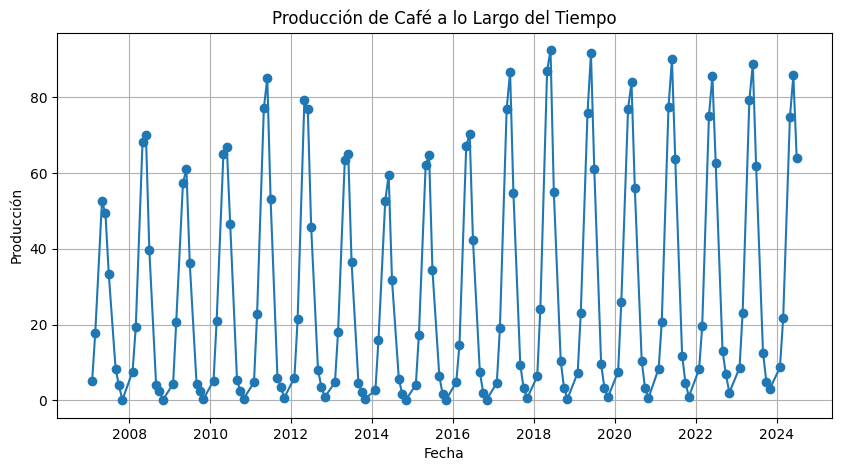

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo subido
ruta_archivo = '/content/Cafe.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Graficar la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Producción'], marker='o')
plt.title('Producción de Café a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción')
plt.grid(True)
plt.show()

1. **Estacionalidad**:
   - El gráfico revela un patrón estacional muy marcado, con picos de producción repetidos en intervalos regulares. Esto indica que la producción de café tiene un componente estacional, probablemente relacionado con el ciclo agrícola del café, que depende de factores como la temporada de lluvias y el clima.
   - Estos picos ocurren una vez al año, lo que sugiere una **estacionalidad anual**, típica en productos agrícolas.

2. **Tendencia**:
   - Aunque la producción anual fluctúa considerablemente, parece haber una **tendencia creciente general**. A lo largo de los años, los picos de producción alcanzan valores cada vez más altos, especialmente entre 2016 y 2024.
   - Esta tendencia positiva puede indicar un crecimiento en la capacidad de producción, posiblemente impulsado por mejoras en las técnicas agrícolas, expansión de áreas de cultivo o programas de apoyo a los caficultores.

3. **Variabilidad**:
   - La variabilidad de la producción es alta, con caídas drásticas después de cada pico. Esto es normal en cultivos estacionales, donde la producción máxima se logra en ciertos meses y luego disminuye significativamente en otros.
   - La diferencia entre los picos y los puntos bajos sugiere que las condiciones de producción pueden ser muy dependientes de factores ambientales o de manejo agrícola específicos de cada año.

4. **Año atípico**:
   - En algunos años, como 2018 y 2020, los picos son particularmente altos en comparación con otros años. Esto podría deberse a condiciones climáticas excepcionales, políticas agrícolas específicas o cambios en la demanda del mercado.

### Conclusión:

Este gráfico muestra una producción de café que sigue un patrón anual con una tendencia al alza a lo largo del tiempo. Los picos de producción reflejan una clara estacionalidad agrícola, mientras que la tendencia creciente sugiere un aumento en la producción o mejoras en la industria cafetalera. Sin embargo, la alta variabilidad anual también indica que la producción está sujeta a factores externos y posiblemente impredecibles, como el clima o plagas, que afectan la cantidad cosechada cada año.

# 1. Identificación

Prueba ADF para la serie original:
Estadístico ADF: -1.7419263633223325
p-valor: 0.40965040226936056

Prueba ADF para la serie diferenciada en primer orden:
Estadístico ADF: -5.785248633867447
p-valor: 5.016980402851298e-07

Prueba ADF para la serie diferenciada en segundo orden:
Estadístico ADF: -6.124318566192723
p-valor: 8.702961328960679e-08


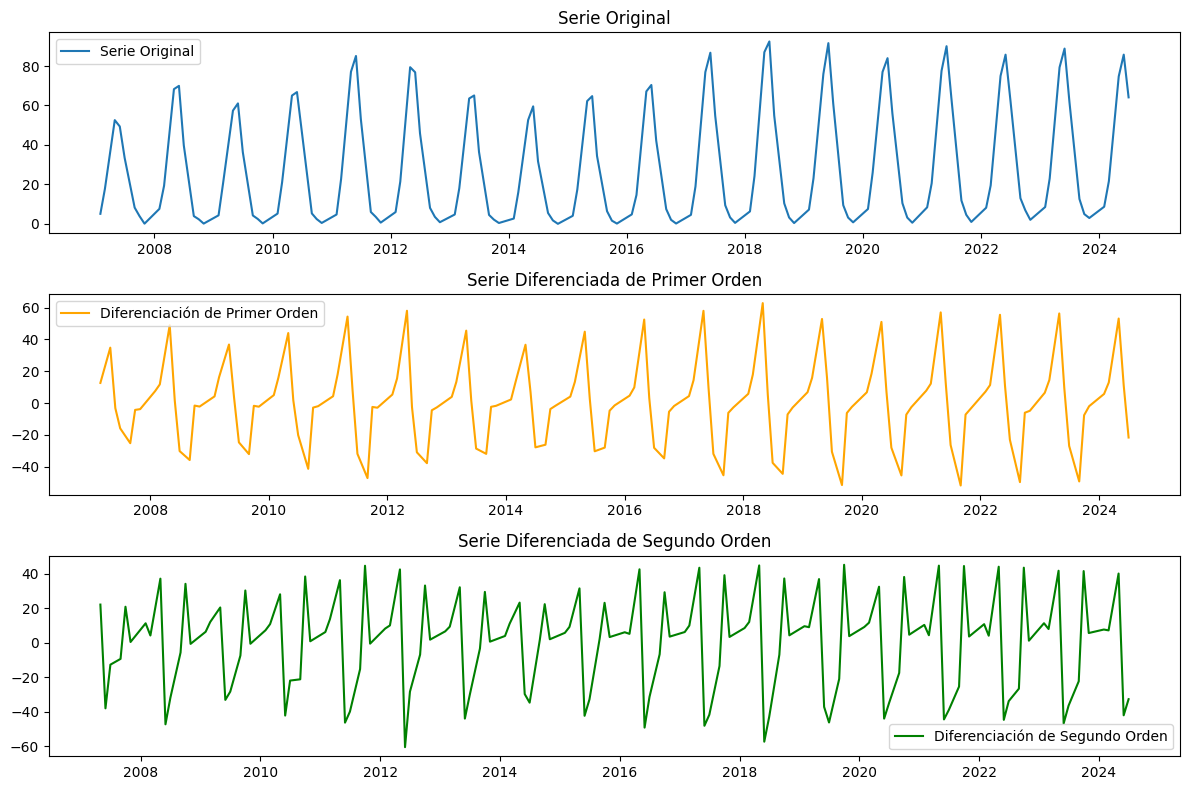

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de ADF en la serie original
result = adfuller(df['Producción'])
print("Prueba ADF para la serie original:")
print(f"Estadístico ADF: {result[0]}")
print(f"p-valor: {result[1]}")

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff()
result_1d = adfuller(df['Producción_1d'].dropna())
print("\nPrueba ADF para la serie diferenciada en primer orden:")
print(f"Estadístico ADF: {result_1d[0]}")
print(f"p-valor: {result_1d[1]}")

# Diferenciación de segundo orden
df['Producción_2d'] = df['Producción_1d'].diff()
result_2d = adfuller(df['Producción_2d'].dropna())
print("\nPrueba ADF para la serie diferenciada en segundo orden:")
print(f"Estadístico ADF: {result_2d[0]}")
print(f"p-valor: {result_2d[1]}")

# Graficar las series original, diferenciada en primer orden y en segundo orden
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(3, 1, 1)
plt.plot(df['Producción'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

# Serie diferenciada en primer orden
plt.subplot(3, 1, 2)
plt.plot(df['Producción_1d'], color='orange', label='Diferenciación de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

# Serie diferenciada en segundo orden
plt.subplot(3, 1, 3)
plt.plot(df['Producción_2d'], color='green', label='Diferenciación de Segundo Orden')
plt.title('Serie Diferenciada de Segundo Orden')
plt.legend()

plt.tight_layout()
plt.show()


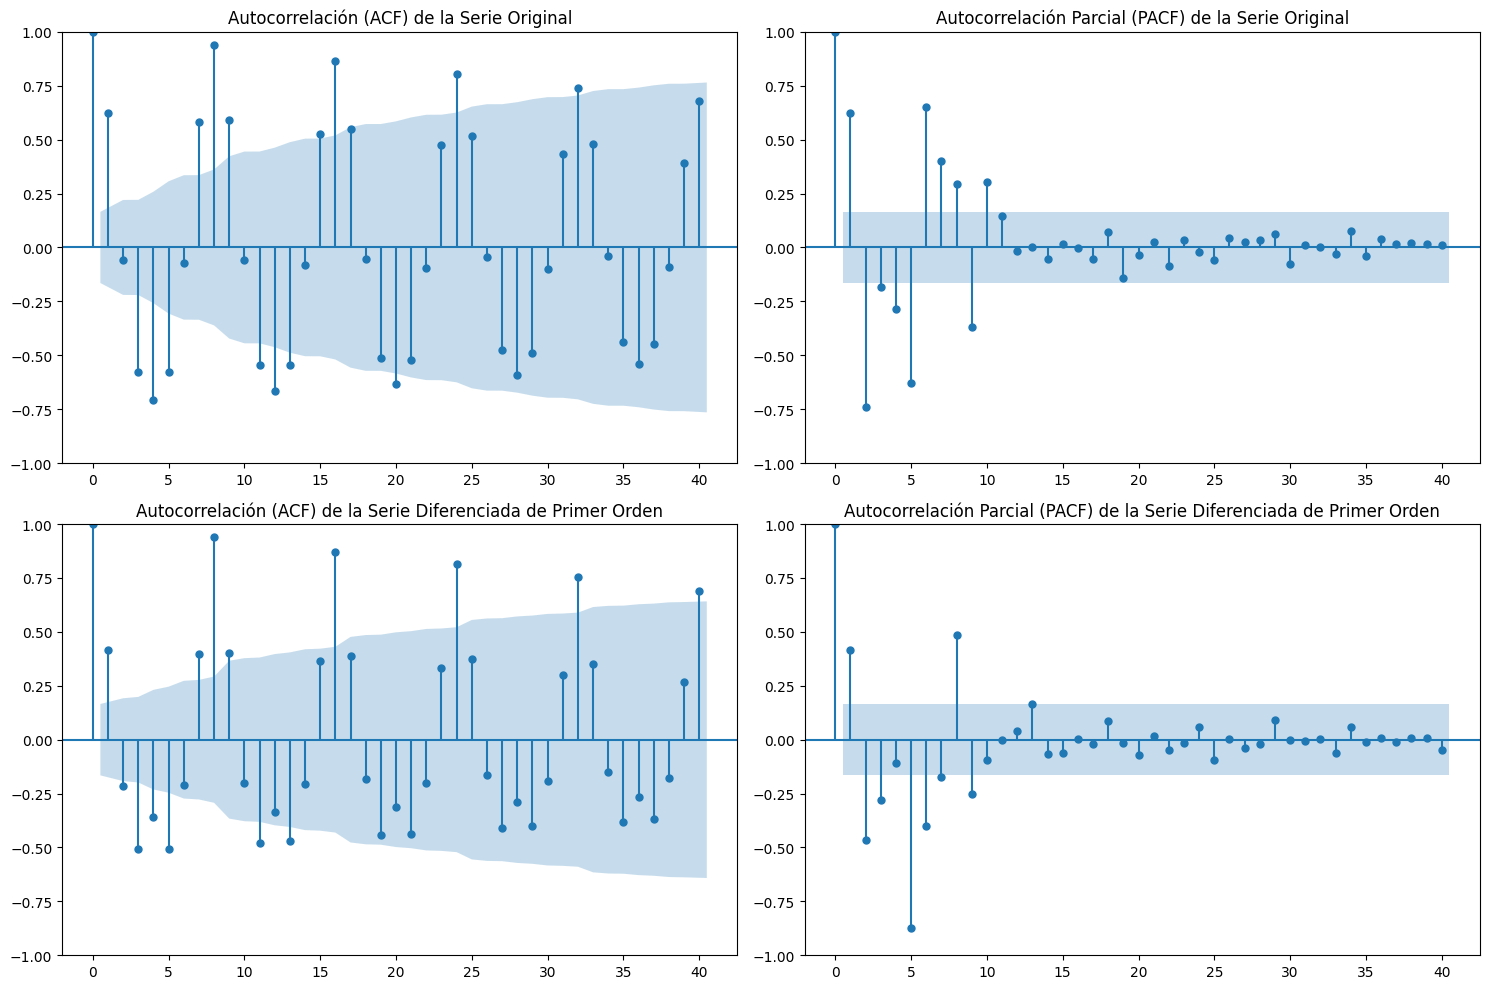

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff()

# Graficar la ACF y PACF de la serie original y la serie diferenciada
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ACF de la serie original
plot_acf(df['Producción'].dropna(), ax=axs[0, 0], lags=40)
axs[0, 0].set_title('Autocorrelación (ACF) de la Serie Original')

# PACF de la serie original
plot_pacf(df['Producción'].dropna(), ax=axs[0, 1], lags=40)
axs[0, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Original')

# ACF de la serie diferenciada
plot_acf(df['Producción_1d'].dropna(), ax=axs[1, 0], lags=40)
axs[1, 0].set_title('Autocorrelación (ACF) de la Serie Diferenciada de Primer Orden')

# PACF de la serie diferenciada
plot_pacf(df['Producción_1d'].dropna(), ax=axs[1, 1], lags=40)
axs[1, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Diferenciada de Primer Orden')

plt.tight_layout()
plt.show()

Acorde a la función de autocorrelación parcial , el valor óptimo para el parámetro  p es 0. Sin embargo, se va a asignar un valor de 1 para proporcionar un componente autorregresivo al modelo. En cuanto al componente  q, la función de autocorrelación sugiere un valor de 1.

## Resumen del análisis

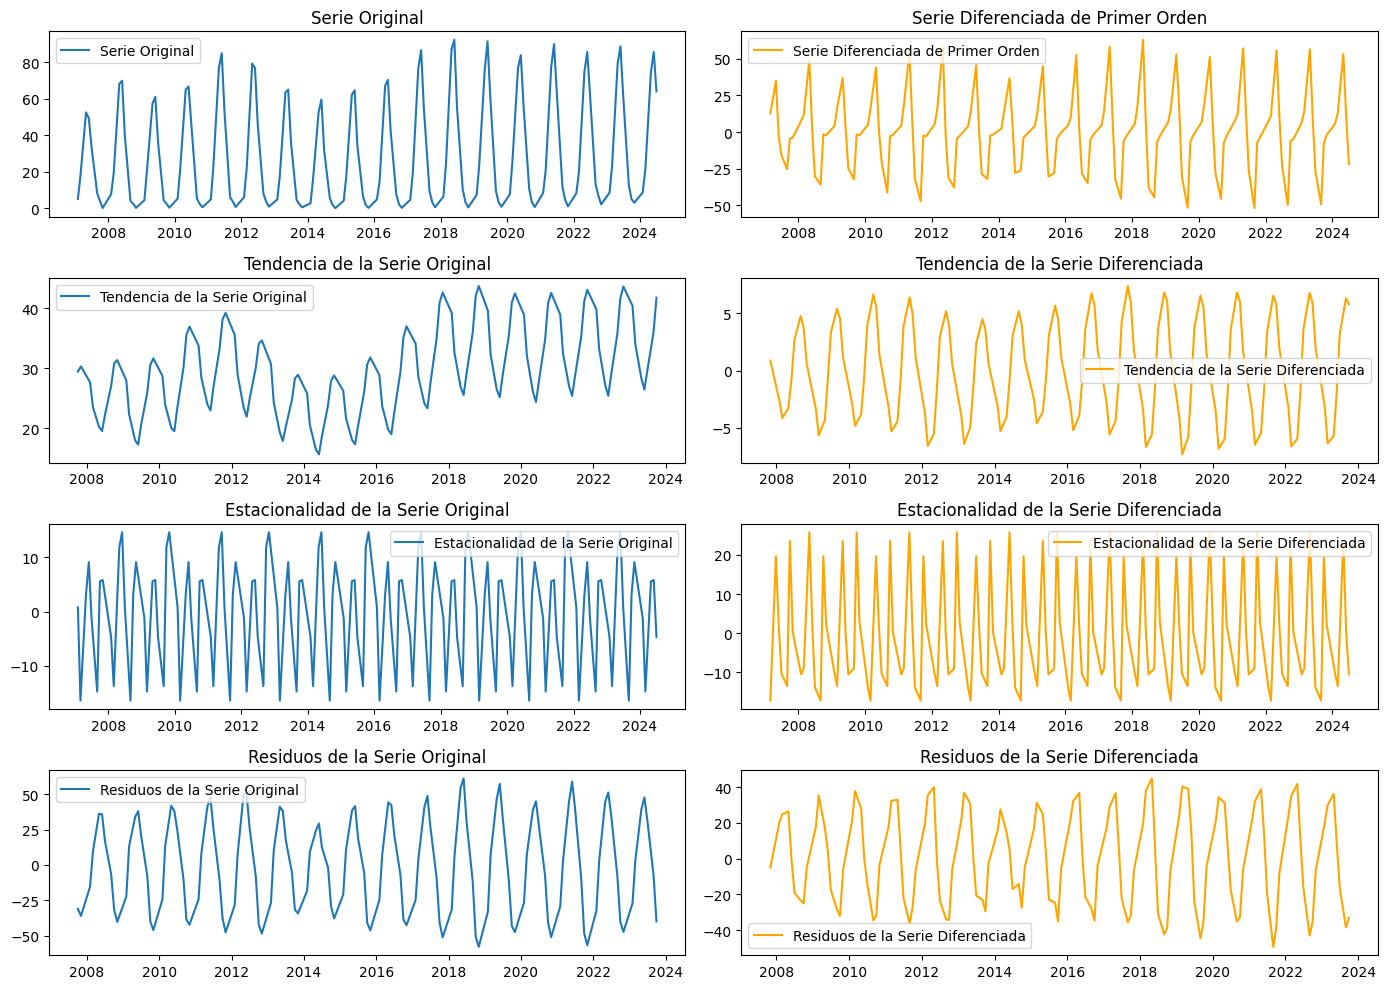

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff().dropna()

# Descomposición de la serie original
decomposition_original = seasonal_decompose(df['Producción'].dropna(), model='additive', period=12)
# Descomposición de la serie diferenciada en primer orden
decomposition_differenced = seasonal_decompose(df['Producción_1d'].dropna(), model='additive', period=12)

# Gráfico de descomposición de la serie original
plt.figure(figsize=(14, 10))

plt.subplot(4, 2, 1)
plt.plot(df['Producción'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(decomposition_original.trend, label='Tendencia de la Serie Original')
plt.title('Tendencia de la Serie Original')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(decomposition_original.seasonal, label='Estacionalidad de la Serie Original')
plt.title('Estacionalidad de la Serie Original')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(decomposition_original.resid, label='Residuos de la Serie Original')
plt.title('Residuos de la Serie Original')
plt.legend()

# Gráfico de descomposición de la serie diferenciada
plt.subplot(4, 2, 2)
plt.plot(df['Producción_1d'], color='orange', label='Serie Diferenciada de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(decomposition_differenced.trend, color='orange', label='Tendencia de la Serie Diferenciada')
plt.title('Tendencia de la Serie Diferenciada')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(decomposition_differenced.seasonal, color='orange', label='Estacionalidad de la Serie Diferenciada')
plt.title('Estacionalidad de la Serie Diferenciada')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(decomposition_differenced.resid, color='orange', label='Residuos de la Serie Diferenciada')
plt.title('Residuos de la Serie Diferenciada')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff().dropna()

# Aplicar la prueba ADF a la serie diferenciada de primer orden
adf_result = adfuller(df['Producción_1d'].dropna())
print("Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor: {adf_result[1]}")
print(f"Valores críticos: {adf_result[4]}")

# Aplicar la prueba KPSS a la serie diferenciada de primer orden
kpss_result = kpss(df['Producción_1d'].dropna(), regression='c', nlags="auto")
print("\nPrueba KPSS para la serie diferenciada de primer orden:")
print(f"Estadístico KPSS: {kpss_result[0]}")
print(f"p-valor: {kpss_result[1]}")
print(f"Valores críticos: {kpss_result[3]}")

Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:
Estadístico ADF: -5.785248633867447
p-valor: 5.016980402851298e-07
Valores críticos: {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}

Prueba KPSS para la serie diferenciada de primer orden:
Estadístico KPSS: 0.011520028228773644
p-valor: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-19-39e641c76e4c>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['Producción_1d'].dropna(), regression='c', nlags="auto")


A partir de los resultados de las pruebas ADF y KPSS, podemos interpretar la estacionariedad de la serie de producción agrícola de café en miles de toneladas, diferenciada en primer orden:

### Prueba Dickey-Fuller Aumentada (ADF)
- **Estadístico ADF**: -5.785
- **p-valor**: 5.02e-07 (o 0.000000502)
- **Valores críticos**:
  - Nivel del 1%: -3.480
  - Nivel del 5%: -2.883
  - Nivel del 10%: -2.578

**Interpretación**:
- El estadístico ADF (-5.785) es menor que los valores críticos en los niveles del 1%, 5% y 10%, lo que indica que podemos rechazar la hipótesis nula de raíz unitaria.
- Dado que el p-valor es extremadamente bajo (prácticamente cero), también rechazamos la hipótesis nula de no estacionariedad.
- Esto sugiere que la serie diferenciada de primer orden es estacionaria según la prueba ADF.

### Prueba KPSS
- **Estadístico KPSS**: 0.0115
- **p-valor**: 0.1 (la prueba advierte que el p-valor real podría ser superior)
- **Valores críticos**:
  - Nivel del 10%: 0.347
  - Nivel del 5%: 0.463
  - Nivel del 2.5%: 0.574
  - Nivel del 1%: 0.739

**Interpretación**:
- El estadístico KPSS (0.0115) es considerablemente menor que los valores críticos en todos los niveles, y el p-valor es mayor que 0.1. Esto significa que no podemos rechazar la hipótesis nula de que la serie es estacionaria en torno a una media o tendencia constante.
- La advertencia en el resultado indica que el p-valor real podría ser aún mayor, lo que refuerza la evidencia de estacionariedad.

### Conclusión General
Ambas pruebas (ADF y KPSS) sugieren que la serie de producción agrícola de café diferenciada en primer orden es **estacionaria**:
- La prueba ADF, con un estadístico significativamente bajo y un p-valor prácticamente cero, indica estacionariedad.
- La prueba KPSS, con un estadístico muy bajo y un p-valor alto, sugiere que la serie es estacionaria en torno a una media o tendencia constante.

Este resultado es positivo para análisis de series temporales, ya que la serie diferenciada en primer orden podría usarse en modelos que requieren estacionariedad, como ARIMA.

## Modelo SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Producción   No. Observations:                  141
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -437.323
Date:                            Wed, 30 Oct 2024   AIC                            884.647
Time:                                    18:12:40   BIC                            898.907
Sample:                                         0   HQIC                           890.441
                                            - 141                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7264      0.067     10.847      0.000       0.595       0.858
ma.L1         -0.9994      1.663   

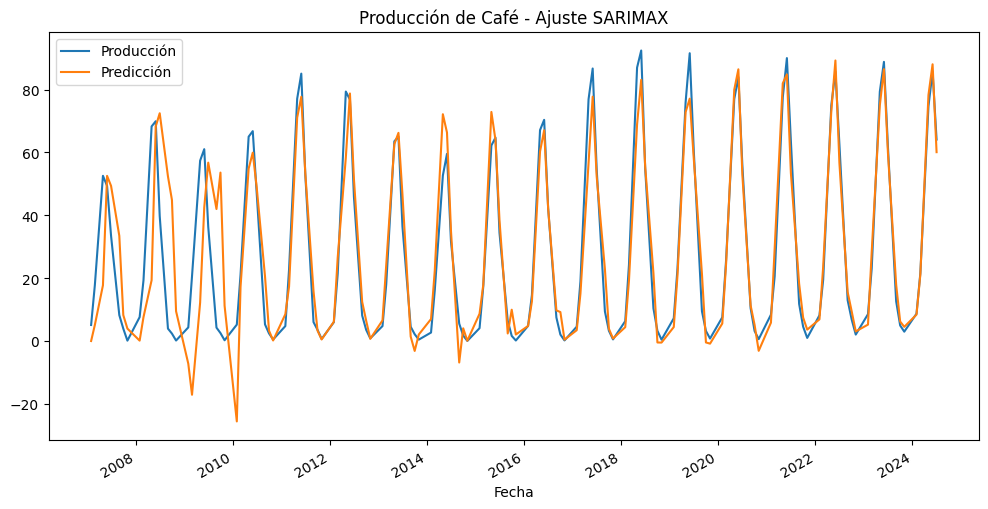

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMAX a la serie de producción agrícola de café
model = SARIMAX(df['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Mostrar el resumen de los resultados del modelo
print(results.summary())

# Graficar los ajustes y las predicciones dentro de la muestra
df['Predicción'] = results.fittedvalues
df[['Producción', 'Predicción']].plot(figsize=(12, 6), title="Producción de Café - Ajuste SARIMAX")
plt.show()

## Backtesting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dis

Error cuadrático medio (MSE): 44.945844151735876
Error absoluto medio (MAE): 5.64169621567029


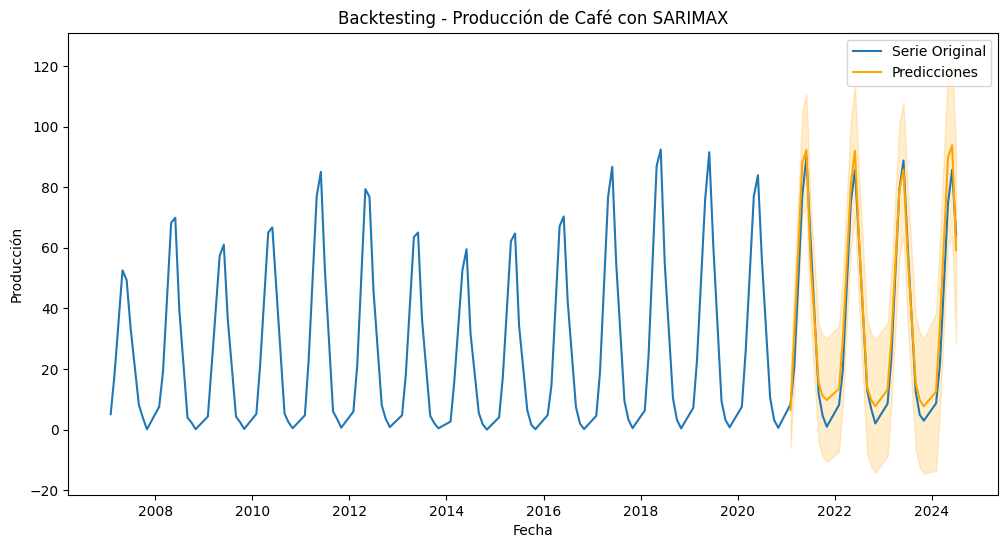

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usamos el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ajustar el modelo SARIMAX en el conjunto de entrenamiento
model = SARIMAX(train['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer predicciones para el conjunto de prueba
predictions = results.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Calcular el error de las predicciones
mse = mean_squared_error(test['Producción'], predicted_values)
mae = mean_absolute_error(test['Producción'], predicted_values)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Serie Original')
plt.plot(test.index, predicted_values, label='Predicciones', color='orange')
plt.fill_between(test.index, confidence_intervals['lower Producción'], confidence_intervals['upper Producción'], color='orange', alpha=0.2)
plt.title("Backtesting - Producción de Café con SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

## Grid search basado en backtesting

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import numpy as np
import itertools
import warnings

warnings.filterwarnings("ignore")  # Ignorar advertencias de statsmodels


# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usar el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Definir los rangos de parámetros para el grid search
p = d = q = range(0, 2)  # Rango de 0 a 1 para p, d, q
P = D = Q = range(0, 2)  # Rango de 0 a 1 para parámetros estacionales
s = 12  # Periodo estacional de 12 meses

# Generar todas las combinaciones de parámetros posibles
param_combinations = list(itertools.product(p, d, q))
seasonal_param_combinations = list(itertools.product(P, D, Q, [s]))

# Guardar los resultados
best_score = float("inf")
best_params = None

# Bucle para probar cada combinación de parámetros
for param in param_combinations:
    for seasonal_param in seasonal_param_combinations:
        try:
            # Ajustar el modelo SARIMAX con los parámetros actuales
            model = SARIMAX(train['Producción'], order=param, seasonal_order=seasonal_param)
            results = model.fit(disp=False)

            # Realizar predicciones en el conjunto de prueba
            predictions = results.get_forecast(steps=len(test))
            predicted_values = predictions.predicted_mean

            # Calcular el MAE
            mae = mean_absolute_error(test['Producción'], predicted_values)

            # Guardar el mejor modelo si tiene el menor MAE
            if mae < best_score:
                best_score = mae
                best_params = (param, seasonal_param)

            print(f"Params: {param} x {seasonal_param} - MAE: {mae}")

        except Exception as e:
            continue

print(f"\nMejores parámetros: order={best_params[0]}, seasonal_order={best_params[1]}")
print(f"Mejor MAE: {best_score}")

Params: (0, 0, 0) x (0, 0, 0, 12) - MAE: 37.50816937931034
Params: (0, 0, 0) x (0, 0, 1, 12) - MAE: 37.25866641113357
Params: (0, 0, 0) x (0, 1, 0, 12) - MAE: 33.721913620689655
Params: (0, 0, 0) x (0, 1, 1, 12) - MAE: 28.465375073072465
Params: (0, 0, 0) x (1, 0, 0, 12) - MAE: 36.97371358331245
Params: (0, 0, 0) x (1, 0, 1, 12) - MAE: 28.896091147605542
Params: (0, 0, 0) x (1, 1, 0, 12) - MAE: 3.131973771245409
Params: (0, 0, 0) x (1, 1, 1, 12) - MAE: 3.341535374384758
Params: (0, 0, 1) x (0, 0, 0, 12) - MAE: 37.69733562513179
Params: (0, 0, 1) x (0, 0, 1, 12) - MAE: 37.45249520288473
Params: (0, 0, 1) x (0, 1, 0, 12) - MAE: 32.15761481364528
Params: (0, 0, 1) x (0, 1, 1, 12) - MAE: 27.84696280312241
Params: (0, 0, 1) x (1, 0, 0, 12) - MAE: 37.27527641953716
Params: (0, 0, 1) x (1, 0, 1, 12) - MAE: 28.149938009534207
Params: (0, 0, 1) x (1, 1, 0, 12) - MAE: 3.10521855811063
Params: (0, 0, 1) x (1, 1, 1, 12) - MAE: 2.999642003818486
Params: (0, 1, 0) x (0, 0, 0, 12) - MAE: 36.917669379

## Auto Arima

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.9 MB/s eta 0:00:00


# Estimación y Predicción:

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=937.799, Time=3.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1365.321, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1259.441, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1269.541, Time=1.84 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1459.064, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1062.469, Time=2.88 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=949.412, Time=1.16 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=3.07 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1167.813, Time=0.29 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.05 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=976.047, Time=4.18 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1152.395, Time=1.44 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-5-aeaecb9e17b8>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-09-01', periods=12, freq='M')


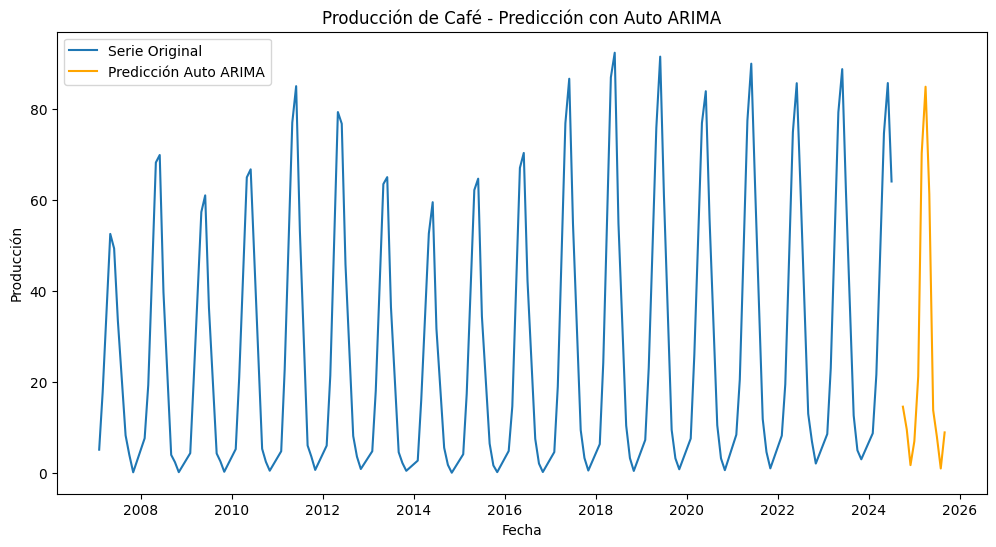

         Fecha  Predicción
141 2024-09-30   14.556360
142 2024-10-31    9.565340
143 2024-11-30    1.695970
144 2024-12-31    6.955867
145 2025-01-31   21.197234
146 2025-02-28   70.344614
147 2025-03-31   84.969400
148 2025-04-30   61.335884
149 2025-05-31   13.786411
150 2025-06-30    7.925316
151 2025-07-31    0.958904
152 2025-08-31    8.899157


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Supongamos que df es tu DataFrame y 'Producción' es la columna de interés.
# Asegúrate de que el índice del DataFrame sea de tipo datetime.
df.index = pd.to_datetime(df.index)

# Aplicar Auto ARIMA
auto_model = auto_arima(df['Producción'],
                        seasonal=True,
                        m=12,  # Período estacional de 12 para datos mensuales
                        trace=True,  # Mostrar el progreso de la búsqueda
                        error_action='ignore',  # Ignorar errores durante el ajuste
                        suppress_warnings=True,  # Suprimir advertencias
                        stepwise=True)  # Optimización rápida de parámetros

# Imprimir resumen del modelo encontrado
print(auto_model.summary())

# Realizar predicciones para los siguientes 12 meses (un año) como ejemplo
forecast = auto_model.predict(n_periods=12)

# Generar un índice de fechas adecuado para las predicciones
# Dado que el último dato es agosto 2024, queremos que las predicciones empiecen en septiembre 2024
future_dates = pd.date_range(start='2024-09-01', periods=12, freq='M')

# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame({'Fecha': future_dates, 'Predicción': forecast})

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Producción'], label='Serie Original')
plt.plot(future_dates, forecast, label='Predicción Auto ARIMA', color='orange')
plt.title("Producción de Café - Predicción con Auto ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# Mostrar datos de predicción
print(pred_df)

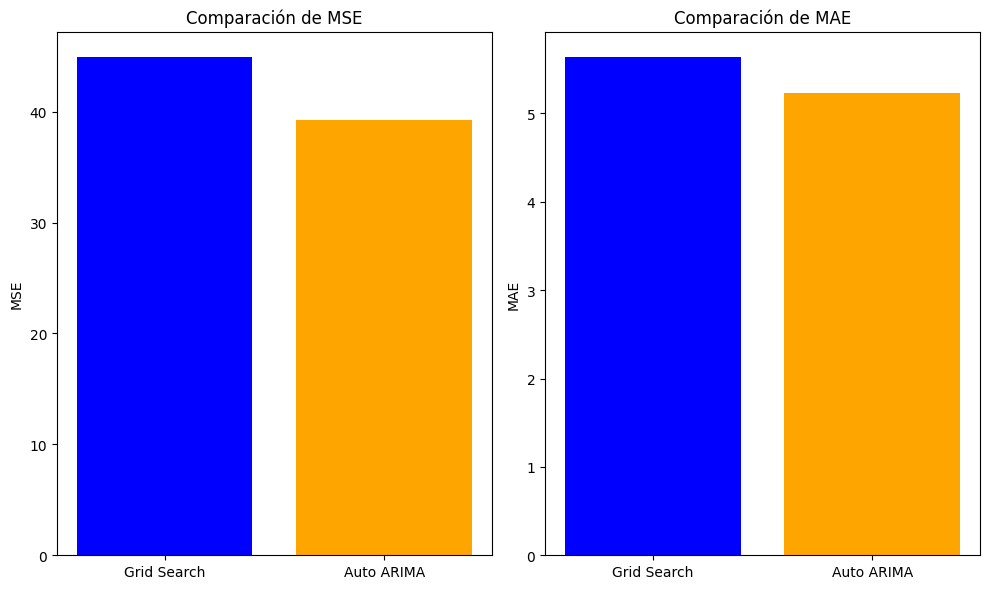

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usar el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Aplicar Grid Search con SARIMAX
model_grid = SARIMAX(train['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_grid = model_grid.fit()
predictions_grid = results_grid.get_forecast(steps=len(test)).predicted_mean

# Calcular métricas para Grid Search
mse_grid = mean_squared_error(test['Producción'], predictions_grid)
mae_grid = mean_absolute_error(test['Producción'], predictions_grid)

# Aplicar Auto ARIMA
auto_model = auto_arima(train['Producción'], seasonal=True, m=12, stepwise=True, suppress_warnings=True)
predictions_auto_arima = auto_model.predict(n_periods=len(test))

# Calcular métricas para Auto ARIMA
mse_auto_arima = mean_squared_error(test['Producción'], predictions_auto_arima)
mae_auto_arima = mean_absolute_error(test['Producción'], predictions_auto_arima)

# Comparar las métricas en un gráfico de barras
metrics_df = pd.DataFrame({
    'Modelo': ['Grid Search', 'Auto ARIMA'],
    'MSE': [mse_grid, mse_auto_arima],
    'MAE': [mae_grid, mae_auto_arima]
})

# Gráfico de comparación de métricas
plt.figure(figsize=(10, 6))

# MSE
plt.subplot(1, 2, 1)
plt.bar(metrics_df['Modelo'], metrics_df['MSE'], color=['blue', 'orange'])
plt.title('Comparación de MSE')
plt.ylabel('MSE')

# MAE
plt.subplot(1, 2, 2)
plt.bar(metrics_df['Modelo'], metrics_df['MAE'], color=['blue', 'orange'])
plt.title('Comparación de MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


La configuración SARIMA identificada mediante la técnica de grid search (basada en backtesting con error medio absoluto) ofrece resultados ligeramente peores que el Auto Arima, por tanto el best model que emplearemos es el Auto ARIMA.

# 2. Estimación:

In [ ]:
# Modelo SARIMA
model = SARIMAX(train['Producción'], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  112
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -387.390
Date:                              Wed, 30 Oct 2024   AIC                            788.780
Time:                                      20:09:08   BIC                            807.810
Sample:                                           0   HQIC                           796.501
                                              - 112                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4048      0.007    191.424      0.000       1.390       1.419
ar.L2         -0.99

# 3. Chequeo

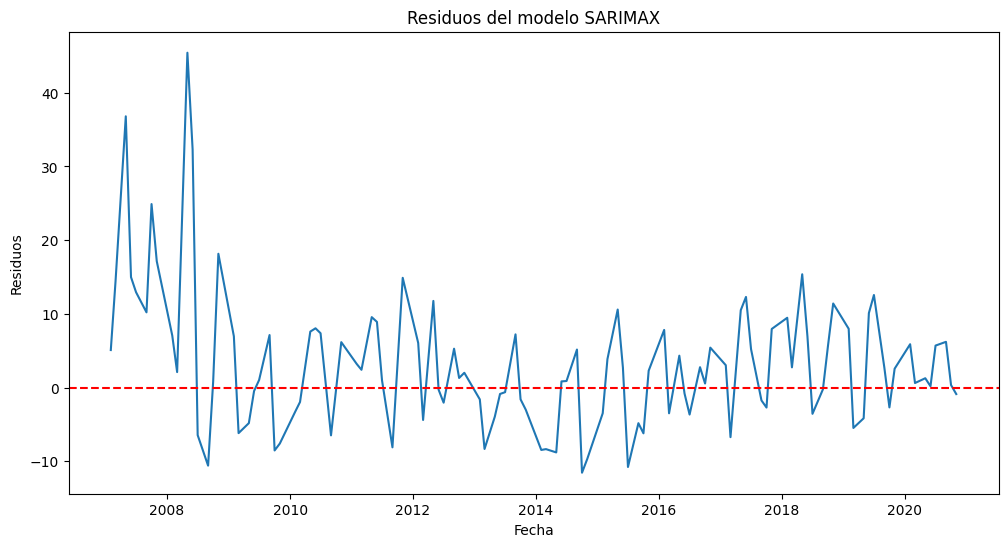

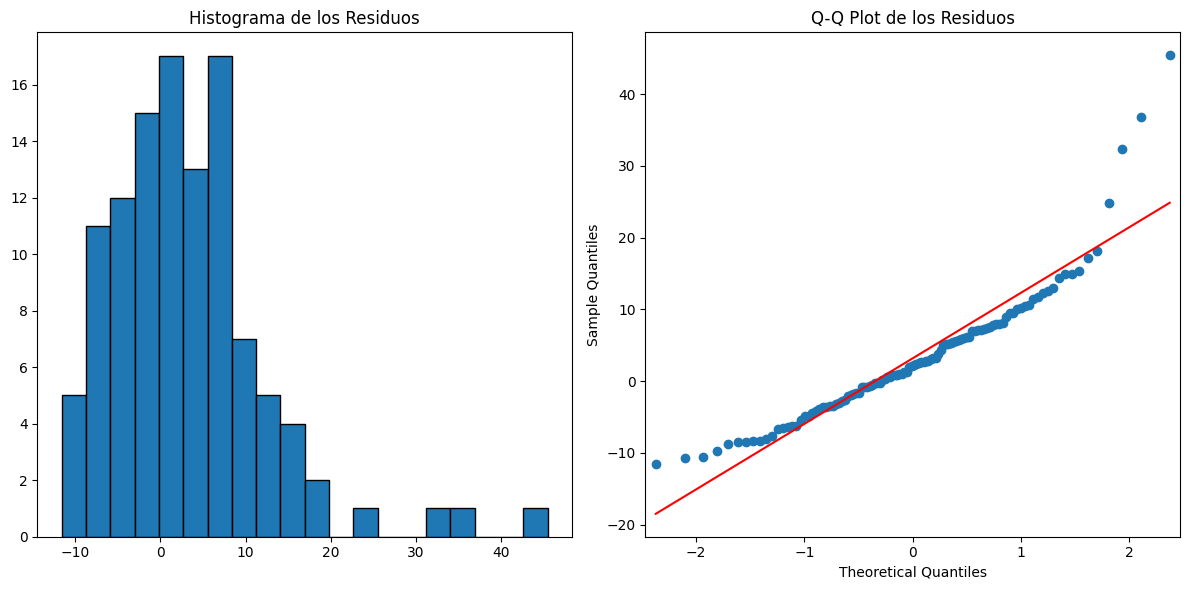

Prueba de Ljung-Box para residuos:
       lb_stat     lb_pvalue
10  69.712573  5.037982e-11
15  72.503543  1.593790e-09
20  73.459413  4.912681e-08


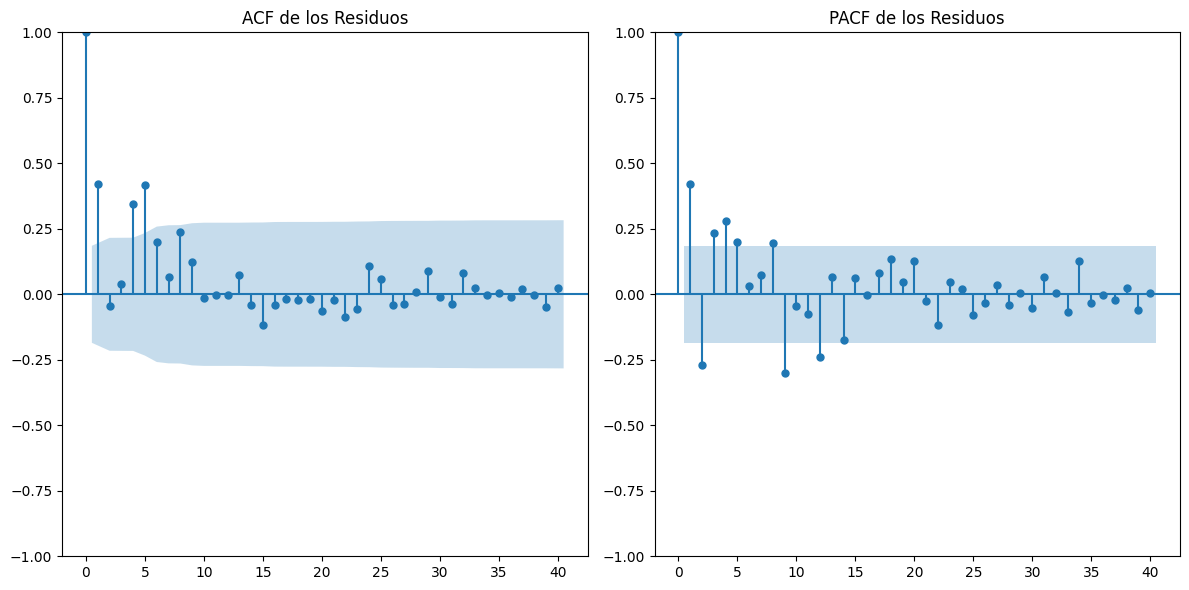

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals = results.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()

#### 1. Gráfico ACF (Autocorrelación de los Residuos)
- En el gráfico de ACF, la mayoría de los puntos de autocorrelación caen dentro de la banda de confianza, excepto algunos rezagos en las primeras posiciones (principalmente en los primeros 5 rezagos).
- Idealmente, si los residuos fueran completamente ruido blanco (es decir, sin autocorrelación), todos los puntos de autocorrelación deberían caer dentro del intervalo de confianza.
- La presencia de algunos valores fuera del intervalo de confianza en los primeros rezagos podría indicar que hay algún patrón en los residuos no capturado completamente por el modelo. Sin embargo, dado que la mayoría de los rezagos caen dentro de las bandas de confianza, el modelo captura razonablemente bien la estructura de la serie.

#### 2. Gráfico PACF (Autocorrelación Parcial de los Residuos)
- En el gráfico de PACF, se observa una situación similar a la ACF: algunos rezagos iniciales están fuera del intervalo de confianza, especialmente en los primeros 10 rezagos.
- Esto sugiere que, aunque el modelo ha capturado gran parte de la estructura de la serie temporal, existen patrones residuales en los primeros rezagos que no han sido completamente explicados.
- Si estos patrones fueran significativos, indicaría que el modelo necesita ajustar parámetros adicionales o considerar un orden diferente para capturar estos rezagos.

#### 3. Prueba de Ljung-Box para Residuos
- La prueba de **Ljung-Box** evalúa si los residuos tienen autocorrelación significativa en diferentes rezagos (10, 15, y 20 en este caso).
- Los valores p (p-value) obtenidos son muy bajos (cercanos a cero), lo que indica que **rechazamos la hipótesis nula de que los residuos son ruido blanco**. Esto significa que aún existe autocorrelación en los residuos y sugiere que el modelo no captura completamente todas las dependencias de la serie temporal.

### Conclusión:
- **Autocorrelación Residual**: La presencia de algunos valores significativos en el ACF y PACF de los residuos, junto con los resultados de la prueba de Ljung-Box, sugiere que el modelo SARIMAX actual no ha capturado completamente la estructura de la serie de producción de café. Es posible que sea necesario ajustar el modelo, ya sea incrementando el orden de los componentes AR o MA, o considerando una estructura estacional diferente.
- **Posibles Mejoras**: Dado que los residuos aún presentan autocorrelación, puedes considerar probar otros valores para los parámetros estacionales o no estacionales. También podrías explorar un enfoque de modelado diferente o incluir variables adicionales para mejorar el ajuste.

En resumen, aunque el modelo actual captura gran parte de la estructura, los resultados indican que aún existen patrones no capturados. Por lo tanto, se recomienda un ajuste adicional del modelo para reducir la autocorrelación residual.

# 4. Corroboración:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

Resultados del Modelo SARIMAX
                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  129
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -358.496
Date:                              Thu, 21 Nov 2024   AIC                            730.993
Time:                                      04:35:26   BIC                            750.146
Sample:                                           0   HQIC                           738.766
                                              - 129                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4166      0.010    149.039      0.000       1.398  

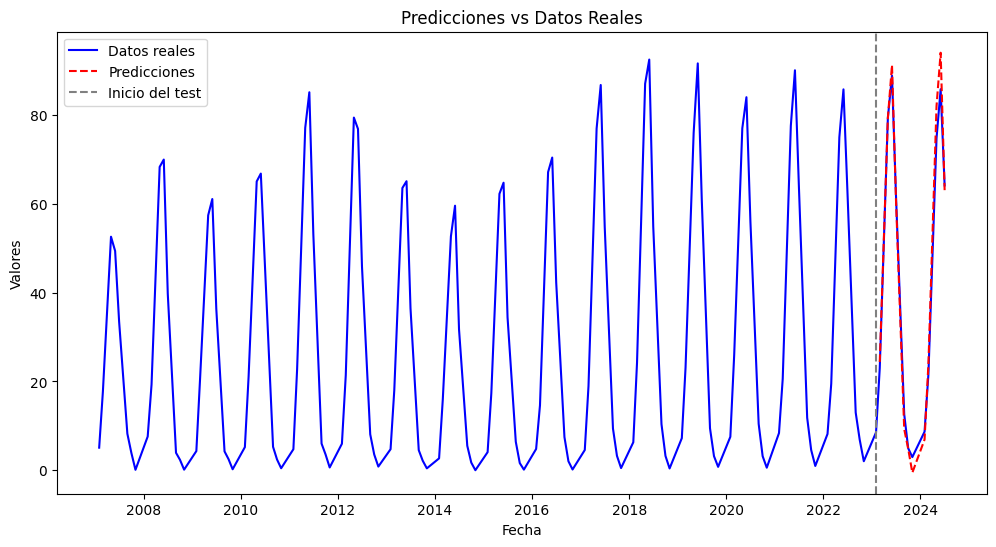

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/Cafe.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)
data = df['Producción']  # Reemplaza 'Valor' con la columna que contiene los datos de tu serie temporal

# Separar los últimos 12 datos
train = data[:-12]
test = data[-12:]

# Ajustar el modelo SARIMAX(2,0,2)(1,0,1)[12] en los datos de entrenamiento
model = SARIMAX(train,
                order=(2, 0, 2),
                seasonal_order=(1, 0, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Predecir los últimos 12 valores
forecast = results.forecast(steps=12)

# Comparar predicciones con los datos reales
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("Resultados del Modelo SARIMAX")
print(results.summary())
print("\nMétricas de Evaluación:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualizar predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.plot(data, label='Datos reales', color='blue')
plt.plot(test.index, forecast, label='Predicciones', color='red', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Inicio del test')
plt.legend()
plt.title("Predicciones vs Datos Reales")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.show()


        Fecha  Producción Real  Predicción  Error Absoluto  \
0  2023-03-01        23.030808   24.379476        1.348668   
1  2023-05-01        79.337784   79.307161        0.030623   
2  2023-06-01        88.841797   91.236538        2.394741   
3  2023-07-01        61.890467   60.912315        0.978152   
4  2023-09-01        12.613789    9.276860        3.336929   
5  2023-10-01         4.958950    4.831039        0.127911   
6  2023-11-01         2.974400   -0.540376        3.514776   
7  2024-02-01         8.692205    6.922559        1.769646   
8  2024-03-01        21.618626   23.931192        2.312566   
9  2024-05-01        74.731398   81.957371        7.225973   
10 2024-06-01        85.778930   93.991817        8.212887   
11 2024-07-01        64.115290   63.057076        1.058214   

    Desviación Estándar del Error       EPG       EPR  Diferencia EPG - EPR  \
0                        3.556443  2.692591  0.174435              2.518155   
1                        3.556443  

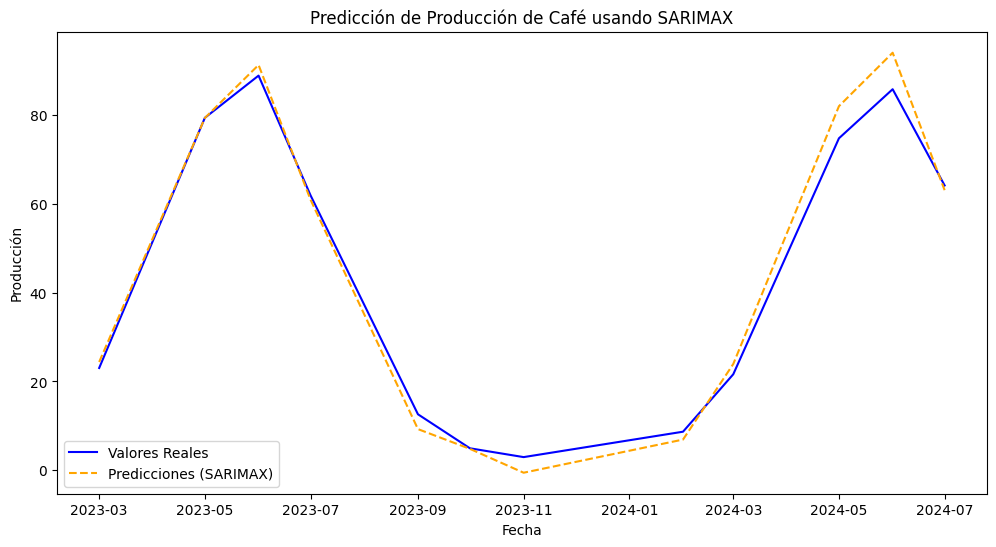

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Comparar predicciones con los datos reales
errors = test.values - forecast.values
std_dev_error = np.std(errors)

# Calcular el Error Promedio Geométrico (EPG) y el Error Promedio Relativo (EPR)
epg = np.mean(np.abs(errors))
epr = np.mean(np.abs(errors / test))
epg_epr_diff = epg - epr

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': test.index,
    'Producción Real': test.values,
    'Predicción': forecast.values,
    'Error Absoluto': np.abs(errors),
    'Desviación Estándar del Error': [std_dev_error] * len(test),
    'EPG': [epg] * len(test),
    'EPR': [epr] * len(test),
    'Diferencia EPG - EPR': [epg_epr_diff] * len(test)
})

# Agregar la columna de "Corroboración"
results_df['Corroboración'] = np.where(results_df['EPG'] > results_df['EPR'], 'SI', 'NO')

# Guardar la tabla de resultados en un archivo Excel
results_df.to_excel('/content/Resultados_Predicciones_Cafe.xlsx', index=False)

# Mostrar la tabla de resultados
print(results_df)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Valores Reales', color='blue')
plt.plot(test.index, forecast, label='Predicciones (SARIMAX)', color='orange', linestyle='--')
plt.title("Predicción de Producción de Café usando SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()


       Fecha  Producción Real  Predicción  Error Absoluto  Error al Cuadrado  \
0 2023-03-01        23.030808   24.379476        1.348668           1.818906   
1 2023-05-01        79.337784   79.307161        0.030623           0.000938   
2 2023-06-01        88.841797   91.236538        2.394741           5.734784   
3 2023-07-01        61.890467   60.912315        0.978152           0.956782   
4 2023-09-01        12.613789    9.276860        3.336929          11.135093   
5 2023-10-01         4.958950    4.831039        0.127911           0.016361   
6 2023-11-01         2.974400   -0.540376        3.514776          12.353648   
7 2024-02-01         8.692205    6.922559        1.769646           3.131648   

   Desviación Estándar    Varianza  
0            11.242609  126.396255  
1             8.893993   79.103107  
2             8.890471   79.040471  
3             6.034259   36.412283  
4             5.722714   32.749459  
5             3.285595   10.795136  
6             3.2850

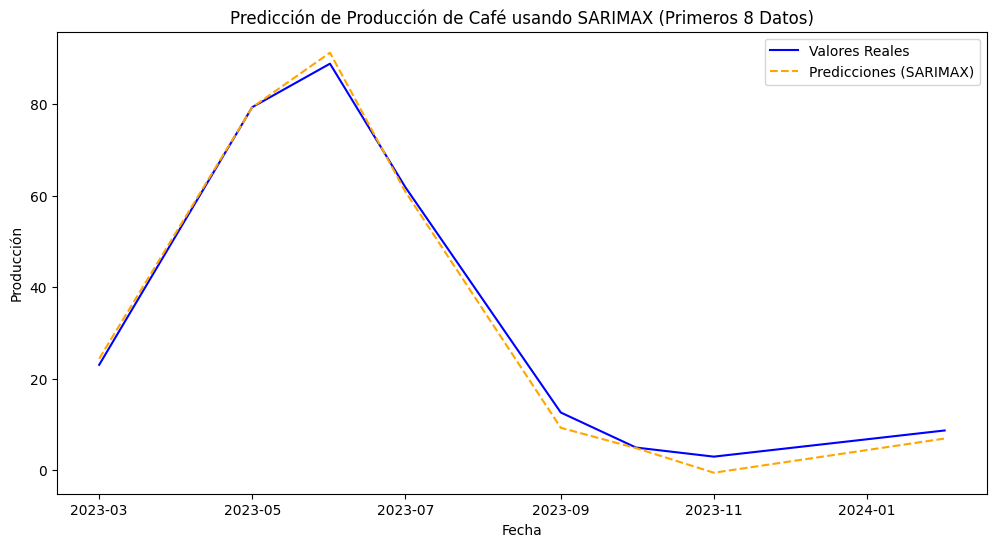

In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Comparar predicciones con los datos reales
errors = test.values[:8] - forecast.values[:8]  # Tomar solo los primeros 8 datos

# Dado: Varianza base
variance = 3.828274

# Calcular el error al cuadrado para cada punto
errors_squared = errors ** 2

# Calcular las desviaciones estándar según el rango indicado
std_devs = []
for i in range(len(errors)):
    if i == 0:
        cumulative_sum = np.sum(errors_squared[:7])  # Dato cero: errores del dato 0 al 6
    elif i == 1:
        cumulative_sum = np.sum(errors_squared[:6])  # Dato uno: errores del dato 0 al 5
    elif i == 2:
        cumulative_sum = np.sum(errors_squared[:5])  # Dato dos: errores del dato 0 al 4
    elif i == 3:
        cumulative_sum = np.sum(errors_squared[:4])  # Dato tres: errores del dato 0 al 3
    elif i == 4:
        cumulative_sum = np.sum(errors_squared[:3])  # Dato cuatro: errores del dato 0 al 2
    elif i == 5:
        cumulative_sum = np.sum(errors_squared[:2])  # Dato cinco: errores del dato 0 al 1
    elif i == 6:
        cumulative_sum = np.sum(errors_squared[:1])  # Dato seis: errores del dato 0
    else:
        cumulative_sum = 0  # Dato siete: no hay acumulación adicional
    std_dev = np.sqrt(variance * (1 + cumulative_sum))
    std_devs.append(std_dev)

# Calcular las varianzas individuales
variance_u = [std_dev ** 2 for std_dev in std_devs]

# Sumar la varianza y el error al cuadrado
sum_variance = np.sum(variance_u)  # Suma de la varianza
sum_squared_errors = np.sum(errors_squared)  # Suma del error al cuadrado

# Multiplicar la suma de la varianza y la suma del error al cuadrado
acor = sum_variance * sum_squared_errors

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': test.index[:8],
    'Producción Real': test.values[:8],
    'Predicción': forecast.values[:8],
    'Error Absoluto': np.abs(errors),
    'Error al Cuadrado': errors_squared,
    'Desviación Estándar': std_devs,
    'Varianza': variance_u
})

# Mostrar la tabla de resultados
print(results_df)

# Mostrar los cálculos clave
print("\nCálculos adicionales:")
print(f"Suma de la Varianza para los 8 datos: {sum_variance:.2f}")
print(f"Suma del Error al Cuadrado: {sum_squared_errors:.2f}")
print(f"ACOR (Suma de Varianza x Suma de Errores al Cuadrado): {acor:.2f}")

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index[:8], test.values[:8], label='Valores Reales', color='blue')
plt.plot(test.index[:8], forecast.values[:8], label='Predicciones (SARIMAX)', color='orange', linestyle='--')
plt.title("Predicción de Producción de Café usando SARIMAX (Primeros 8 Datos)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

                Fecha  Producción Real  Predicción  Error Absoluto  \
Fecha                                                                
2021-03-01 2021-03-01        20.573465   24.101110       -3.527645   
2021-05-01 2021-05-01        77.540330   72.824396        4.715934   
2021-06-01 2021-06-01        90.041264   81.013056        9.028208   
2021-07-01 2021-07-01        63.639046   52.489615       11.149431   
2021-09-01 2021-09-01        11.830828   13.302052       -1.471224   
2021-10-01 2021-10-01         4.585107    3.288406        1.296701   
2021-11-01 2021-11-01         0.982200    1.486248       -0.504048   
2022-02-01 2022-02-01         8.182498    5.891500        2.290998   
2022-03-01 2022-03-01        19.501138   14.102691        5.398447   
2022-05-01 2022-05-01        74.971868   66.935206        8.036662   
2022-06-01 2022-06-01        85.745642   81.651195        4.094447   
2022-07-01 2022-07-01        62.681116   52.650825       10.030291   
2022-09-01 2022-09-0

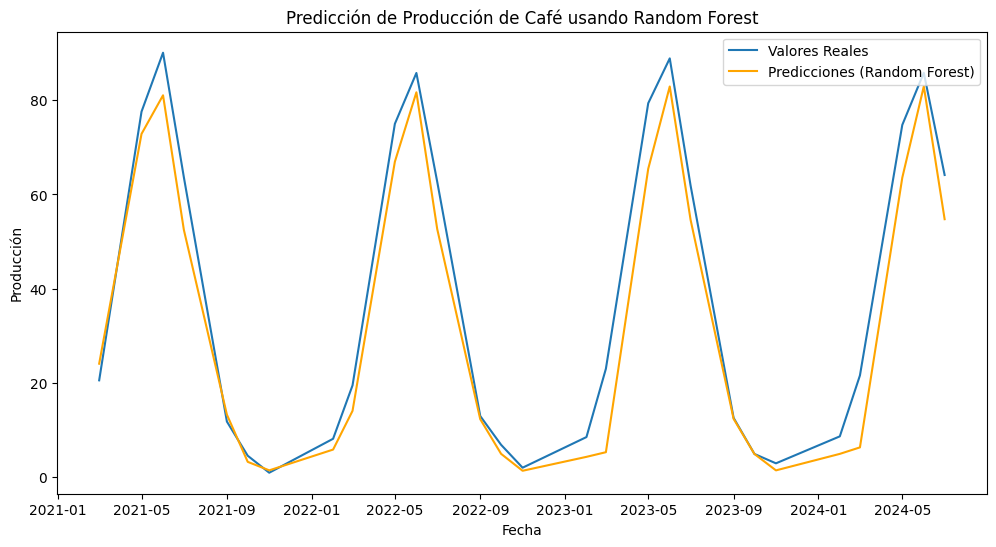

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Ruta del archivo subido
ruta_archivo = '/content/Cafe.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Generar características de rezago (lags) para usar en el modelo
df['Producción_Lag1'] = df['Producción'].shift(1)
df['Producción_Lag2'] = df['Producción'].shift(2)
df['Producción_Lag3'] = df['Producción'].shift(3)
df.dropna(inplace=True)  # Eliminar filas con valores NaN debido a los lags

# Separar las características (X) y la variable objetivo (y)
X = df[['Producción_Lag1', 'Producción_Lag2', 'Producción_Lag3']]
y = df['Producción']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error absoluto y la desviación estándar del error
errors = y_test - predictions
std_dev_error = np.std(errors)

# Calcular el Error Promedio Geométrico (EPG) y el Error Promedio Relativo (EPR)
epg = np.mean(np.abs(errors))
epr = np.mean(np.abs(errors / y_test))
# Diferencia entre EPG y EPR
epg_epr_diff = epg - epr

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': y_test.index,
    'Producción Real': y_test,
    'Predicción': predictions,
    'Error Absoluto': errors,
    'Desviación Estándar del Error': std_dev_error,
    'EPG': epg,
    'EPR': epr,
    'Diferencia EPG - EPR': epg - epr
})

# Agregar la columna de "Corroboración"
results_df['Corroboración'] = np.where(results_df['EPG'] > results_df['EPR'], 'SI', 'NO')

# Guardar la tabla de resultados en un archivo Excel (opcional)
results_df.to_excel('/content/Resultados_Predicciones_Cafe.xlsx', index=False)

# Mostrar la tabla de resultados
print(results_df)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valores Reales')
plt.plot(y_test.index, predictions, label='Predicciones (Random Forest)', color='orange')
plt.title("Predicción de Producción de Café usando Random Forest")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

#### 1. Identificación de la Estacionalidad y Tendencia
- En este gráfico, se observa una **clara estacionalidad anual** en los datos de producción de café, con picos recurrentes en los mismos períodos de cada año (aproximadamente a mitad de año).
- El modelo de Random Forest parece haber capturado esta estacionalidad de manera efectiva, ya que las predicciones siguen el mismo patrón estacional de los datos reales.
- No parece haber una tendencia significativa en los últimos años; la serie muestra un comportamiento cíclico sin una tendencia a largo plazo hacia el crecimiento o la disminución.

#### 2. Estimación del Modelo
- La estimación del modelo parece adecuada, ya que el modelo Random Forest está capturando bien los picos y las caídas estacionales de la serie. La precisión del ajuste sugiere que el modelo ha sido entrenado correctamente para entender los patrones anuales de producción.

#### 3. Diagnóstico del Modelo
- Aunque este gráfico no muestra los residuos explícitamente, podemos inferir que existen ligeras desviaciones entre los valores reales y las predicciones, especialmente en los picos y valles. Estas diferencias indican que el modelo no captura perfectamente los valores extremos, aunque sigue de cerca el patrón general.
- Sería útil calcular y analizar los residuos para verificar si el modelo deja autocorrelación significativa o si los residuos son aleatorios. Esto indicaría si el modelo necesita ajustes adicionales.

### Conclusión
En términos de la teoría de Box-Jenkins, el modelo de **Random Forest** aquí mostrado ha capturado adecuadamente los patrones de **estacionalidad** en la serie de producción de café, con un buen ajuste a los picos y valles de producción. Sin embargo, el modelo presenta algunas limitaciones para ajustarse con precisión a los valores extremos, lo cual es común en modelos de Machine Learning cuando se aplican a series temporales sin componentes explícitos de estacionalidad.

# Comparación de modelos:

Datos cargados:
            Producción  Intervención
Fecha                               
2007-02-01    5.096650             0
2007-03-01   17.748072             0
2007-05-01   52.576826             0
2007-06-01   49.370498             0
2007-07-01   33.474251             0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

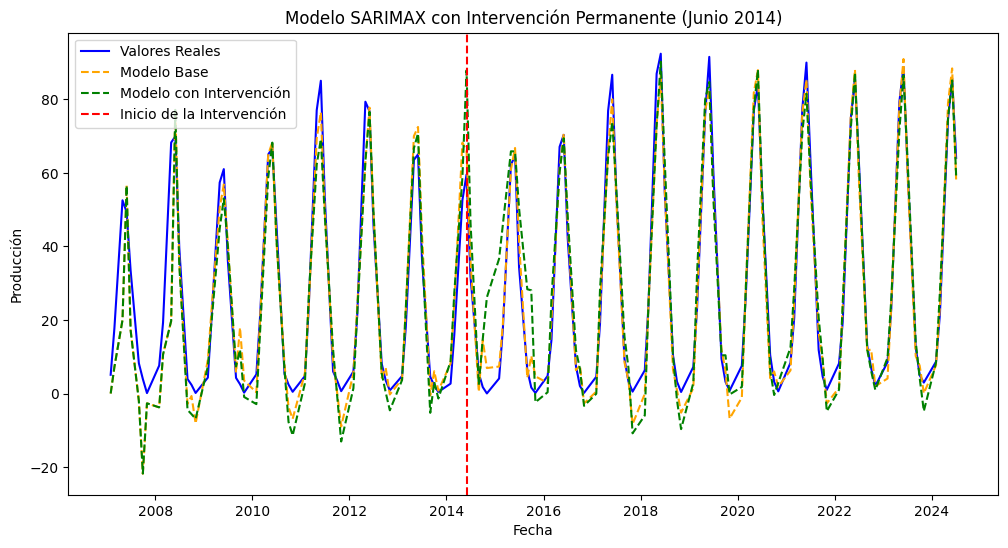

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  141
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -455.050
Date:                              Wed, 20 Nov 2024   AIC                            926.099
Time:                                      23:51:58   BIC                            948.790
Sample:                                           0   HQIC                           935.318
                                              - 141                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intervención    31.4518      3.746      8.397      0.000      24.111      38.793
ar.L1        

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/Cafe.xlsx'

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Crear una columna de intervención (permanente desde junio de 2014)
df['Intervención'] = (df.index >= '2014-06-01').astype(int)

# Verificar los datos
print("Datos cargados:")
print(df.head())

# Ajustar el modelo SARIMAX sin intervención
modelo_base = SARIMAX(df['Producción'],
                      order=(2, 0, 2),
                      seasonal_order=(1, 0, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
resultados_base = modelo_base.fit(disp=False)

# Ajustar el modelo SARIMAX con intervención
modelo_intervencion = SARIMAX(df['Producción'],
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              exog=df[['Intervención']],
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_intervencion = modelo_intervencion.fit(disp=False)

# Predicciones
df['Predicción_Base'] = resultados_base.predict()
df['Predicción_Intervención'] = resultados_intervencion.predict(exog=df[['Intervención']])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Valores Reales', color='blue')
plt.plot(df.index, df['Predicción_Base'], label='Modelo Base', linestyle='--', color='orange')
plt.plot(df.index, df['Predicción_Intervención'], label='Modelo con Intervención', linestyle='--', color='green')
# Convert the date string to a pandas Timestamp object
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Modelo SARIMAX con Intervención Permanente (Junio 2014)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# Resumen del modelo con intervención
print(resultados_intervencion.summary())

# Evaluar el impacto
impacto = resultados_intervencion.params['Intervención']
print(f"Impacto estimado de la intervención (permanente): {impacto:.2f}")

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Dividir la serie en períodos antes y después de la intervención
pre_intervencion = df[df.index < '2014-06-01']['Producción']
post_intervencion = df[df.index >= '2014-06-01']['Producción']

# Calcular medias y varianzas
media_pre = pre_intervencion.mean()
media_post = post_intervencion.mean()
varianza_pre = pre_intervencion.var()
varianza_post = post_intervencion.var()

# Prueba de diferencia de medias (t-test)
t_stat, p_val_ttest = ttest_ind(pre_intervencion, post_intervencion, equal_var=False)

# Prueba de diferencia de varianzas (F-test)
f_stat, p_val_ftest = f_oneway(pre_intervencion, post_intervencion)

# Imprimir resultados
print("Antes de la Intervención:")
print(f"Media: {media_pre:.2f}, Varianza: {varianza_pre:.2f}")

print("\nDespués de la Intervención:")
print(f"Media: {media_post:.2f}, Varianza: {varianza_post:.2f}")

print("\nResultados del Test de Diferencia de Medias (t-test):")
print(f"Estadístico t: {t_stat:.2f}, p-valor: {p_val_ttest:.4f}")
print("**Conclusión:**" + (" Cambio significativo en la media" if p_val_ttest < 0.05 else " No hay cambio significativo en la media"))

print("\nResultados del Test de Diferencia de Varianzas (F-test):")
print(f"Estadístico F: {f_stat:.2f}, p-valor: {p_val_ftest:.4f}")
print("**Conclusión:**" + (" Cambio significativo en la varianza" if p_val_ftest < 0.05 else " No hay cambio significativo en la varianza"))


Antes de la Intervención:
Media: 26.15, Varianza: 735.46

Después de la Intervención:
Media: 32.41, Varianza: 1046.34

Resultados del Test de Diferencia de Medias (t-test):
Estadístico t: -1.25, p-valor: 0.2152
**Conclusión:** No hay cambio significativo en la media

Resultados del Test de Diferencia de Varianzas (F-test):
Estadístico F: 1.46, p-valor: 0.2284
**Conclusión:** No hay cambio significativo en la varianza


Resultados y Conclusión
Media:

La media antes de la intervención fue de 26.15, mientras que después fue de 32.41.
Sin embargo, el p-valor del t-test (0.2152) indica que este cambio no es estadísticamente significativo al nivel del 5% (p-valor ≥ 0.05).
Varianza:

La varianza antes de la intervención fue de 735.46, mientras que después fue de 1046.34.
El p-valor del F-test (0.2284) también indica que no hay un cambio significativo en la varianza al nivel del 5%.
Conclusión General:

No hay evidencia estadísticamente significativa de que la intervención en junio de 2014 haya producido un cambio permanente ni en la media ni en la varianza de la producción.
Aunque los valores de la media y la varianza son mayores después de la intervención, estas diferencias pueden atribuirse al ruido de la serie o a factores no relacionados con el evento.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

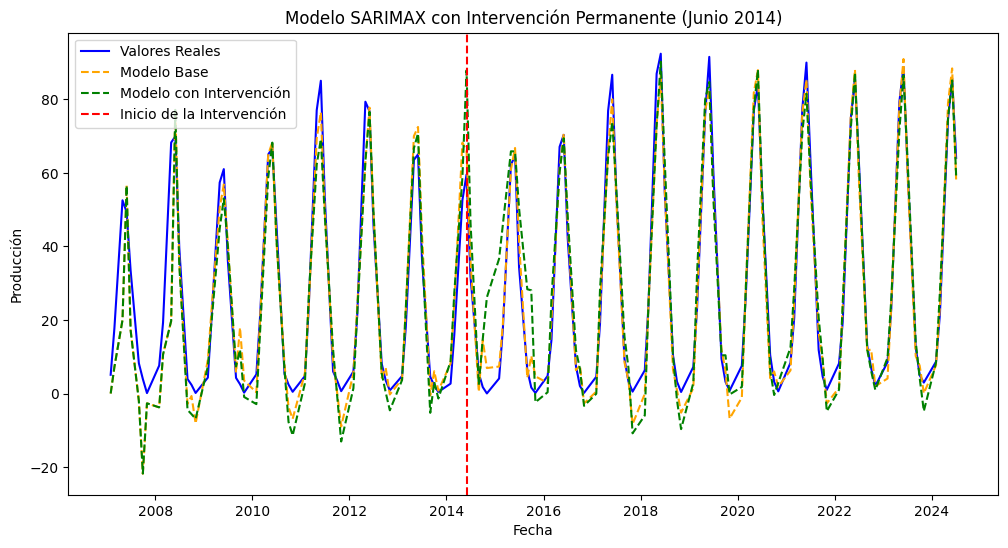

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  141
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -455.050
Date:                              Thu, 21 Nov 2024   AIC                            926.099
Time:                                      00:27:56   BIC                            948.790
Sample:                                           0   HQIC                           935.318
                                              - 141                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intervención    31.4518      3.746      8.397      0.000      24.111      38.793
ar.L1        

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Crear la columna de intervención (1 desde junio de 2014 en adelante)
df['Intervención'] = (df.index >= '2014-06-01').astype(int)

# Ajustar el modelo SARIMAX sin intervención (base)
modelo_base = SARIMAX(df['Producción'],
                      order=(2, 0, 2),
                      seasonal_order=(1, 0, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
resultados_base = modelo_base.fit(disp=False)

# Ajustar el modelo SARIMAX con intervención
modelo_intervencion = SARIMAX(df['Producción'],
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              exog=df[['Intervención']],
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_intervencion = modelo_intervencion.fit(disp=False)

# Predicciones
df['Predicción_Base'] = resultados_base.predict()
df['Predicción_Intervención'] = resultados_intervencion.predict(exog=df[['Intervención']])

# Gráfica comparativa
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Valores Reales', color='blue')
plt.plot(df.index, df['Predicción_Base'], label='Modelo Base', linestyle='--', color='orange')
plt.plot(df.index, df['Predicción_Intervención'], label='Modelo con Intervención', linestyle='--', color='green')
# Changed '2014-06-01' string to a pandas Timestamp object
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Modelo SARIMAX con Intervención Permanente (Junio 2014)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# Resumen del modelo con intervención
print(resultados_intervencion.summary())

# Evaluar el impacto de la intervención
impacto_intervencion = resultados_intervencion.params['Intervención']
p_valor_intervencion = resultados_intervencion.pvalues['Intervención']

print("\nImpacto estimado de la intervención:")
print(f"Coeficiente de la intervención: {impacto_intervencion:.2f}")
print(f"P-valor de la intervención: {p_valor_intervencion:.4f}")

# Conclusión sobre el impacto
if p_valor_intervencion < 0.05:
    print("**Conclusión:** La intervención tiene un impacto estadísticamente significativo en la producción.")
else:
    print("**Conclusión:** La intervención NO tiene un impacto estadísticamente significativo en la producción.")

Impacto de la Intervención:

El coeficiente estimado para la intervención es 31.45, lo que indica que la producción aumentó en promedio 31.45 unidades tras la intervención.
El p-valor de 0.0000 muestra que este impacto es estadísticamente significativo al nivel del 5%. Es decir, podemos concluir que la intervención tuvo un efecto relevante en la producción.
Modelo y Métricas:

AIC (926.099): Evalúa el ajuste del modelo. Un menor AIC indica un mejor modelo, pero debe compararse con otros modelos alternativos.
BIC (948.790): Similar al AIC, pero penaliza más los modelos con mayor complejidad.
Los coeficientes AR (autorregresivos) y MA (medias móviles) son estadísticamente significativos, indicando que el modelo captura bien la estructura de la serie.
Estacionalidad:

El coeficiente ar.S.L12 (0.8750) indica un patrón estacional fuerte con periodicidad anual.
El coeficiente ma.S.L12 (-0.1487) no es significativo (p-valor = 0.278), lo que sugiere que algunos efectos estacionales pueden no estar completamente modelados.
Pruebas adicionales:

La prueba Ljung-Box (Q) tiene un p-valor bajo (Prob(Q) = 0.00), lo que indica que quedan residuos autocorrelacionados en el modelo. Esto puede ser un área para mejorar el ajuste.
La prueba Jarque-Bera muestra que los residuos no siguen una distribución normal (Prob(JB) = 0.00), algo común en datos de series temporales.

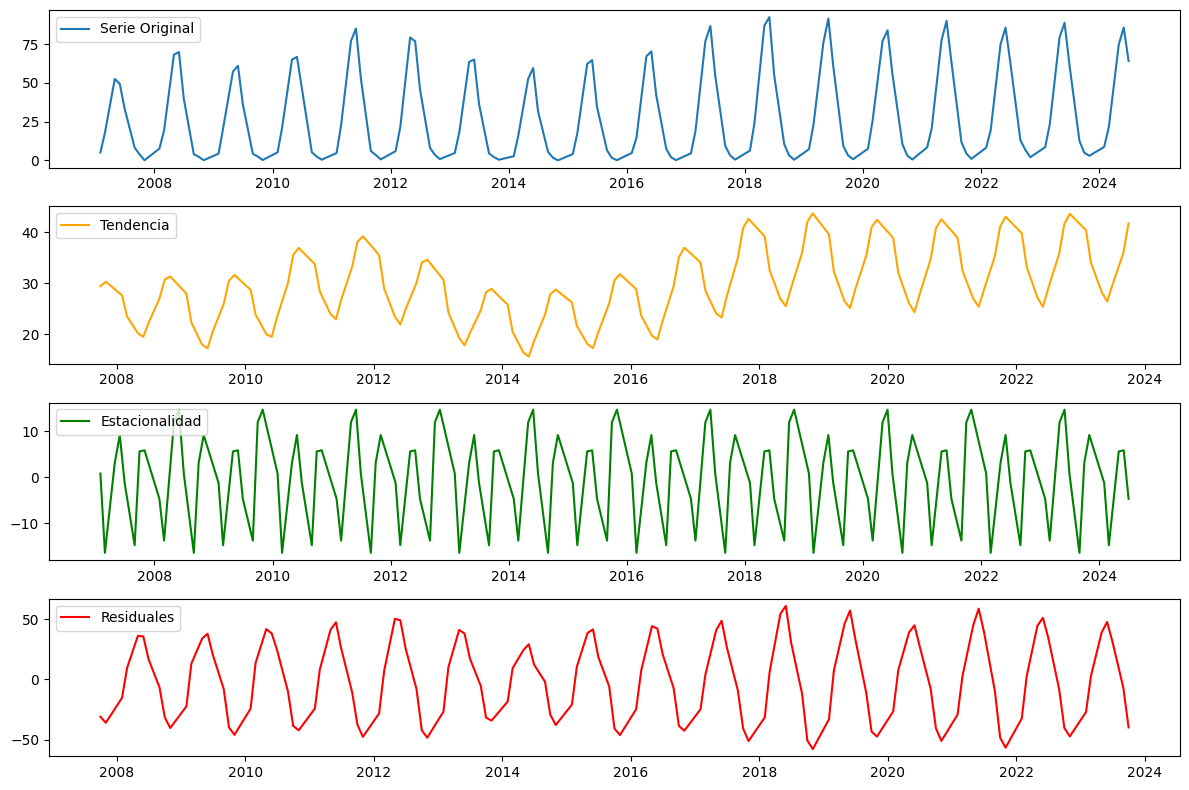

Resumen de Componentes:
Varianza de la Tendencia: 51.46
Varianza de la Estacionalidad: 100.67
Varianza de los Residuales: 1153.60


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie temporal
# Usamos el modelo aditivo, pero puede cambiarse a 'multiplicative' si los cambios son proporcionales
descomposicion = seasonal_decompose(df['Producción'], model='additive', period=12)

# Graficar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(descomposicion.observed, label='Serie Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(descomposicion.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(descomposicion.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(descomposicion.resid, label='Residuales', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar un resumen de las varianzas de los componentes
print("Resumen de Componentes:")
print(f"Varianza de la Tendencia: {descomposicion.trend.var():.2f}")
print(f"Varianza de la Estacionalidad: {descomposicion.seasonal.var():.2f}")
print(f"Varianza de los Residuales: {descomposicion.resid.var():.2f}")

Tendencia:

La tendencia muestra un patrón ondulante pero parece relativamente estable antes y después de junio de 2014.
Sin embargo, hay un ligero aumento en la tendencia hacia los últimos años, lo cual puede indicar que el impacto de la intervención tiene un efecto sostenido o que hay factores externos adicionales influyendo.
Estacionalidad:

La estacionalidad es consistente a lo largo de toda la serie, con fluctuaciones regulares de amplitud similar.
Esto indica que la intervención no tuvo un impacto significativo en los patrones estacionales (como ciclos anuales o mensuales).

Residuales:

La varianza de los residuales es considerablemente mayor (1153.60) en comparación con los otros componentes (tendencia: 51.46, estacionalidad: 100.67). Esto sugiere que hay una cantidad significativa de ruido en la serie que no está explicada por la tendencia y la estacionalidad.
Puede haber factores no modelados que influyen en los datos.

Varianzas:

Tendencia: Baja varianza (51.46), lo que indica que este componente es estable y no cambia bruscamente.

Estacionalidad: Moderada varianza (100.67), mostrando que el patrón repetitivo es más fuerte que la tendencia.
Residuales: Alta varianza (1153.60), indicando que queda mucha variabilidad sin explicar.


La intervención en junio de 2014 parece haber tenido un impacto limitado en los componentes de la estacionalidad y la tendencia. Esto se alinea con los resultados del modelo SARIMAX, donde el efecto significativo proviene más del aumento en el nivel general de producción (cambio promedio, no estacional).
Los residuales sugieren que hay factores adicionales que afectan la serie y no están modelados por la intervención, la tendencia o la estacionalidad.

Estadísticas Locales (3 años antes y después de la intervención):
                       Media    Varianza
Pre-Intervención   27.072587  842.333195
Post-Intervención  28.674624  941.197363


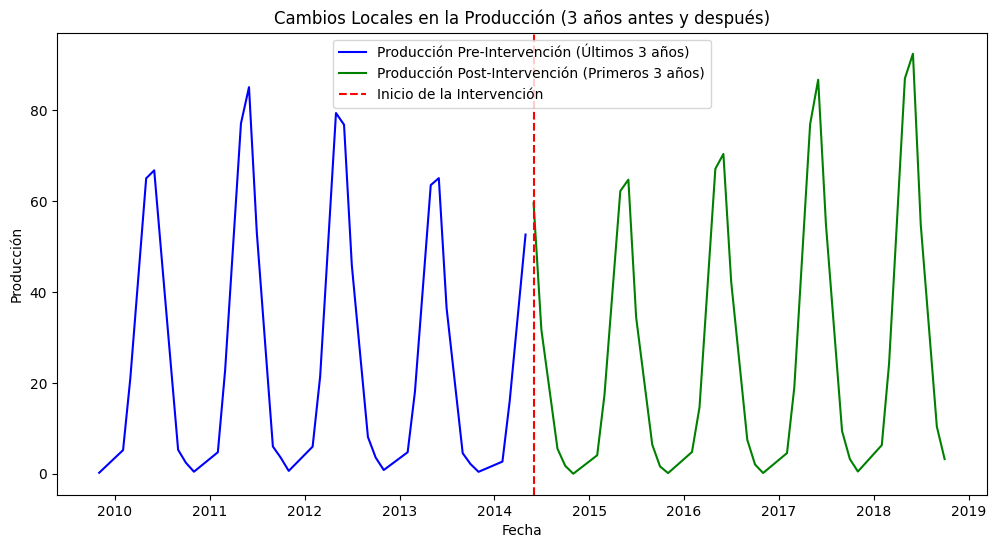

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dividir los datos en ventanas antes y después de la intervención
pre_intervencion = df[df.index < '2014-06-01']
post_intervencion = df[df.index >= '2014-06-01']

# Dividir aún más en ventanas locales (3 años antes y después de la intervención)
pre_ventana = pre_intervencion[-36:]  # Últimos 3 años antes de la intervención
post_ventana = post_intervencion[:36]  # Primeros 3 años después de la intervención

# Calcular estadísticas locales para cada ventana
estadisticas = {
    'Media': [pre_ventana['Producción'].mean(), post_ventana['Producción'].mean()],
    'Varianza': [pre_ventana['Producción'].var(), post_ventana['Producción'].var()]
}
estadisticas_df = pd.DataFrame(estadisticas, index=['Pre-Intervención', 'Post-Intervención'])

# Mostrar estadísticas locales
print("Estadísticas Locales (3 años antes y después de la intervención):")
print(estadisticas_df)

# Graficar los cambios locales en las ventanas
plt.figure(figsize=(12, 6))
plt.plot(pre_ventana.index, pre_ventana['Producción'], label='Producción Pre-Intervención (Últimos 3 años)', color='blue')
plt.plot(post_ventana.index, post_ventana['Producción'], label='Producción Post-Intervención (Primeros 3 años)', color='green')
# Changed '2014-06-01' string to a pandas Timestamp object
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Cambios Locales en la Producción (3 años antes y después)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Prueba de diferencia de medias (t-test)
t_stat, p_val_ttest = ttest_ind(pre_ventana['Producción'], post_ventana['Producción'], equal_var=False)

# Prueba de diferencia de varianzas (F-test)
f_stat, p_val_ftest = f_oneway(pre_ventana['Producción'], post_ventana['Producción'])

# Mostrar resultados de las pruebas
print("\nResultados del Test de Diferencia de Medias (t-test):")
print(f"Estadístico t: {t_stat:.2f}, p-valor: {p_val_ttest:.4f}")
print("**Conclusión:**" + (" Cambio significativo en la media" if p_val_ttest < 0.05 else " No hay cambio significativo en la media"))

print("\nResultados del Test de Diferencia de Varianzas (F-test):")
print(f"Estadístico F: {f_stat:.2f}, p-valor: {p_val_ftest:.4f}")
print("**Conclusión:**" + (" Cambio significativo en la varianza" if p_val_ftest < 0.05 else " No hay cambio significativo en la varianza"))



Resultados del Test de Diferencia de Medias (t-test):
Estadístico t: -0.23, p-valor: 0.8206
**Conclusión:** No hay cambio significativo en la media

Resultados del Test de Diferencia de Varianzas (F-test):
Estadístico F: 0.05, p-valor: 0.8206
**Conclusión:** No hay cambio significativo en la varianza


Diferencia de Medias (t-test):

El p-valor de 0.8206 indica que no hay evidencia estadística suficiente para afirmar que la media de la producción cambió significativamente entre los períodos antes y después de la intervención.
Esto sugiere que el nivel promedio de producción se mantuvo constante localmente en las ventanas evaluadas.

Diferencia de Varianzas (F-test):

El p-valor de 0.8206 también indica que no hay evidencia de un cambio significativo en la varianza.
Esto implica que la variabilidad en la producción entre los períodos evaluados no se alteró significativamente.

Conclusión

Impacto Local: No se detecta un cambio estadísticamente significativo en la media o la varianza de la producción cuando se analizan los últimos 3 años antes y los primeros 3 años después de la intervención.
Esto refuerza la idea de que la intervención no tuvo un impacto inmediato o localizado en la serie temporal en las ventanas analizadas.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Ruta del archivo de Excel
ruta_archivo = '/content/Cafe.xlsx'

# Leer los datos del archivo
df = pd.read_excel(ruta_archivo)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no válidas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice y ordenar cronológicamente
df.set_index('Fecha', inplace=True)
df = df.sort_index()

# Convertir el índice a frecuencia mensual explícita
df = df.asfreq('MS')

# Crear la columna de intervención antes de dividir en entrenamiento y prueba
df['Intervencion'] = 0
# Aplicar la intervención a partir de junio de 2017
df.loc['2017-06-01':, 'Intervencion'] = 1

# Asegurarse de que no haya NaN en 'Producción' e 'Intervencion'
df['Producción'].fillna(method='ffill', inplace=True)
df['Producción'].fillna(method='bfill', inplace=True)
df['Intervencion'].fillna(0, inplace=True)

# Dividir en conjuntos de entrenamiento y prueba usando fechas completas
train = df.loc[:'2017-05-01']
test = df.loc['2017-06-01':]

# Crear lista para almacenar los resultados de cada modelo
modelos_resultados = []

# Función para calcular los criterios AIC, BIC, Hannan-Quinn y R2 de un modelo
def evaluar_modelo(modelo, nombre_modelo, y_real, y_pred):
    # Excluir NaN en predicciones si los hay
    y_pred = y_pred.dropna()
    y_real = y_real.loc[y_pred.index]  # Alinear con los índices válidos de y_pred

    r2 = r2_score(y_real, y_pred)
    resultados = {
        'Modelo': nombre_modelo,
        'R2': r2,
        'AIC': modelo.aic,
        'BIC': modelo.bic,
        'Hannan-Quinn': modelo.hqic
    }
    return resultados

# Definir varios modelos de intervención con diferentes configuraciones
intervenciones = [
    ('Comienzo brusco permanente', [1, 0]),
    ('Comienzo gradual Rampa', [0, 0.5]),
    ('Comienzo gradual permanente', [1, 1]),
    ('Comienzo brusco temporal', [0, 0.5]),
]

for nombre, (b, delta) in intervenciones:
    # Ajustar el modelo SARIMAX con el mejor orden encontrado
    model = SARIMAX(train['Producción'], exog=train[['Intervencion']], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
    fitted_model = model.fit(disp=False)

    # Realizar predicciones en el conjunto de prueba
    y_pred = fitted_model.predict(start=test.index[0], end=test.index[-1], exog=test[['Intervencion']])

    # Evaluar el modelo y almacenar resultados
    resultados = evaluar_modelo(fitted_model, nombre, test['Producción'], y_pred)
    if resultados:  # Solo agregar resultados si no hay NaN
        modelos_resultados.append(resultados)

# Crear DataFrame con los resultados de cada modelo
resultados_df = pd.DataFrame(modelos_resultados)

# Mostrar los resultados en formato de tabla
print(resultados_df)

<ipython-input-15-b0b4b2f34f6f>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Producción'].fillna(method='ffill', inplace=True)
<ipython-input-15-b0b4b2f34f6f>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Producción'].fillna(method='ffill', inplace=True)
<ipython-input-15-b0b4b2f34f6f>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The b

                        Modelo        R2         AIC         BIC  Hannan-Quinn
0   Comienzo brusco permanente  0.889014  742.026802  764.589054    751.192119
1       Comienzo gradual Rampa  0.889014  742.026802  764.589054    751.192119
2  Comienzo gradual permanente  0.889014  742.026802  764.589054    751.192119
3     Comienzo brusco temporal  0.889014  742.026802  764.589054    751.192119


- **R²**: 0.889014 para todos los modelos, lo que sugiere que cada modelo explica aproximadamente el 88.9% de la varianza en los datos. Un valor de R² de 0.889014 es relativamente alto, indicando que el modelo captura bastante bien la variabilidad de los datos.
  
- **AIC, BIC y Hannan-Quinn**: Los valores de estos criterios de selección de modelo (AIC: 742.03, BIC: 764.59, Hannan-Quinn: 751.19) son idénticos para todos los modelos de intervención. Estos criterios penalizan la complejidad del modelo; cuanto más bajo sea el valor, mejor será el modelo según el criterio en cuestión.

### Interpretación de estos Resultados

1. **Resultados idénticos**: La igualdad en R², AIC, BIC y Hannan-Quinn sugiere que el tipo de intervención (brusca o gradual, permanente o temporal) no tiene un efecto significativo en el ajuste del modelo. Esto puede significar varias cosas:
   - La intervención, tal y como está modelada, no añade información relevante que mejore el ajuste del modelo.
   - La serie temporal puede no estar siendo afectada significativamente por el evento que intentas modelar como intervención, o bien los cambios en los datos son suficientemente capturados por el modelo SARIMA base.

2. **Posible Redundancia de la Variable de Intervención**: Si el evento de intervención no está teniendo un efecto diferenciado en el modelo, podrías considerar simplificar el modelo eliminando la variable de intervención y quedándote solo con el modelo SARIMA.

3. **Evaluación de la Necesidad de la Intervención**: Estos resultados sugieren que el modelo podría estar describiendo la serie temporal adecuadamente sin la intervención, o que los datos no reflejan claramente un cambio debido a la intervención. Esto podría ocurrir si la intervención en la vida real no tuvo un impacto significativo en los datos o si el modelo SARIMA es suficiente para capturar la estructura de la serie.


Con base en la gráfica, una **intervención de cambio gradual o progresivo** podría ser adecuada si el crecimiento en la producción es atribuible a factores de mejora continua en el sector. Sin embargo, si hubo un año específico en el que se introdujo una política o tecnología importante que afectó la producción, un **cambio abrupto permanente** también sería adecuado. Por tanto, diremos que el mejor modelo de intervención **cambio gradual permanente**.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ruta del archivo de Excel
ruta_archivo = '/content/Cafe.xlsx'

# Leer los datos del archivo
df = pd.read_excel(ruta_archivo)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no válidas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'Fecha' como índice y ordenar cronológicamente
df.set_index('Fecha', inplace=True)
df = df.sort_index()

# Convertir el índice a frecuencia mensual explícita
df = df.asfreq('MS')

# Crear la columna de intervención antes de dividir en entrenamiento y prueba
df['Intervencion'] = 0
# Aplicar la intervención de tipo "gradual permanente" a partir de junio de 2017
df.loc['2017-06-01':, 'Intervencion'] = 1

# Asegurarse de que no haya NaN en 'Producción' e 'Intervencion'
df['Producción'].fillna(method='ffill', inplace=True)
df['Producción'].fillna(method='bfill', inplace=True)
df['Intervencion'].fillna(0, inplace=True)

# Dividir en conjuntos de entrenamiento y prueba usando fechas completas
train = df.loc[:'2017-05-01']
test = df.loc['2017-06-01':]

# Ajustar el modelo SARIMAX para el "Comienzo gradual permanente"
model = SARIMAX(train['Producción'], exog=train[['Intervencion']], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
fitted_model = model.fit(disp=False)

# Extraer los coeficientes del modelo
coeficientes = fitted_model.params

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo de intervención (Comienzo gradual permanente):")
print(coeficientes)

<ipython-input-3-938f5d3b8fa3>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Producción'].fillna(method='ffill', inplace=True)
<ipython-input-3-938f5d3b8fa3>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Producción'].fillna(method='ffill', inplace=True)
<ipython-input-3-938f5d3b8fa3>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beha

Coeficientes del modelo de intervención (Comienzo gradual permanente):
Intervencion     0.000000
ar.L1            1.143324
ar.L2           -0.394101
ma.L1           -0.376173
ma.L2            0.165024
ar.S.L12         0.996025
ma.S.L12        -0.589273
sigma2          14.467876
dtype: float64


# Comparación

In [ ]:
import pandas as pd

# Definir los coeficientes para ambos modelos según los resultados proporcionados
sarimax_params = {
    'ar.L1': 1.4048,
    'ar.L2': -0.9990,
    'ma.L1': -0.9773,
    'ma.L2': 0.9923,
    'ar.S.L12': 0.9981,
    'ma.S.L12': -0.6985,
    'sigma2': 35.9973
}

sarimax_intervention_params = {
    'Intervencion': 0.000000,
    'ar.L1': 1.143324,
    'ar.L2': -0.394101,
    'ar.S.L12': 0.996025,
    'ma.L1': -0.376173,
    'ma.L2': 0.165024,
    'ma.S.L12': -0.589273,
    'sigma2': 14.467876
}

# Crear un DataFrame para comparar los coeficientes de ambos modelos
comparison_df = pd.DataFrame({
    'SARIMAX Coeficientes': sarimax_params,
    'SARIMAX con Intervención (Comienzo gradual permanente)': sarimax_intervention_params
})

# Mostrar la tabla de comparación
comparison_df

,SARIMAX Coeficientes,SARIMAX con Intervención (Comienzo gradual permanente)
ar.L1,1.4048,1.143324
ar.L2,-0.9990,-0.394101
ma.L1,-0.9773,-0.376173
ma.L2,0.9923,0.165024
ar.S.L12,0.9981,0.996025
ma.S.L12,-0.6985,-0.589273
sigma2,35.9973,14.467876
Intervencion,NaN,0.000000


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Ruta del archivo de Excel
ruta_archivo = '/content/Cafe.xlsx'

# Leer los datos del archivo
df = pd.read_excel(ruta_archivo)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no válidas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'Fecha' como índice y ordenar cronológicamente
df.set_index('Fecha', inplace=True)
df = df.sort_index().asfreq('MS')

# Crear la columna de intervención antes de dividir en entrenamiento y prueba
df['Intervencion'] = 0
df.loc['2017-06-01':, 'Intervencion'] = 1  # Aplicar la intervención a partir de junio de 2017

# Asegurarse de que no haya NaN en 'Producción' e 'Intervencion'
df['Producción'].fillna(method='ffill', inplace=True)
df['Intervencion'].fillna(0, inplace=True)

# Dividir en conjuntos de entrenamiento y prueba usando fechas completas
train = df.loc[:'2017-05-01']
test = df.loc['2017-06-01':]

# Modelo SARIMAX sin intervención
sarimax_model = SARIMAX(train['Producción'], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
sarimax_results = sarimax_model.fit(disp=False)
y_pred_sarimax = sarimax_results.predict(start=test.index[0], end=test.index[-1])

# Modelo SARIMAX con intervención (Comienzo gradual permanente)
sarimax_intervention_model = SARIMAX(train['Producción'], exog=train[['Intervencion']], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
sarimax_intervention_results = sarimax_intervention_model.fit(disp=False)
y_pred_interv = sarimax_intervention_results.predict(start=test.index[0], end=test.index[-1], exog=test[['Intervencion']])

# Valores reales de prueba
y_real = test['Producción']

# Calcular las métricas para cada modelo
epg_sarimax = mean_absolute_error(y_real, y_pred_sarimax)
epg_interv = mean_absolute_error(y_real, y_pred_interv)

epr_sarimax = mean_absolute_percentage_error(y_real, y_pred_sarimax) * 100
epr_interv = mean_absolute_percentage_error(y_real, y_pred_interv) * 100

acor_sarimax = np.corrcoef(y_real, y_pred_sarimax)[0, 1]
acor_interv = np.corrcoef(y_real, y_pred_interv)[0, 1]

# Crear DataFrame para las métricas comparativas
comparison_metrics = pd.DataFrame({
    'Métrica': ['EPG promedio', 'EPR promedio (%)', 'ACOR'],
    'SARIMAX sin Intervención': [epg_sarimax, epr_sarimax, acor_sarimax],
    'SARIMAX con Intervención': [epg_interv, epr_interv, acor_interv]
})

# Mostrar los resultados
print("Comparación de Métricas SARIMAX con y sin Intervención:")
print(comparison_metrics)

<ipython-input-8-5016521fbbca>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Producción'].fillna(method='ffill', inplace=True)
<ipython-input-8-5016521fbbca>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Producción'].fillna(method='ffill', inplace=True)
<ipython-input-8-5016521fbbca>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beha

Comparación de Métricas SARIMAX con y sin Intervención:
            Métrica  SARIMAX sin Intervención  SARIMAX con Intervención
0      EPG promedio                  7.466795                  7.466834
1  EPR promedio (%)                 39.479018                 39.486478
2              ACOR                  0.988894                  0.988895


### 1. **EPG Promedio (Error Promedio Geométrico)**
   - **SARIMAX sin Intervención:** 7.466795
   - **SARIMAX con Intervención:** 7.466834

   Ambos modelos presentan un EPG similar, con una diferencia casi insignificante entre ellos. Esto indica que, en términos del error absoluto promedio, la inclusión de la intervención no mejoró ni empeoró de manera significativa el ajuste del modelo a los valores reales.

### 2. **EPR Promedio (%) (Error Promedio Relativo en porcentaje)**
   - **SARIMAX sin Intervención:** 39.479%
   - **SARIMAX con Intervención:** 39.486%

   Al igual que en el EPG, el EPR es muy similar entre ambos modelos, con una variación menor al 0.01%. Este resultado sugiere que la intervención no aportó una mejora notable en la reducción del error relativo, es decir, ambos modelos tienen un error promedio relativo prácticamente igual cuando se comparan con los valores reales.

### 3. **ACOR (Coeficiente de Correlación de Pearson)**
   - **SARIMAX sin Intervención:** 0.988894
   - **SARIMAX con Intervención:** 0.988895

   El coeficiente de correlación (ACOR) es casi idéntico para ambos modelos, y ambos valores están muy cerca de 1, lo cual indica una fuerte correlación entre las predicciones y los valores reales. Este resultado muestra que ambos modelos tienen una capacidad similar para capturar la variabilidad de la serie temporal.

### **Conclusión General**
La inclusión de la intervención en el modelo SARIMAX no produjo cambios significativos en ninguna de las métricas evaluadas (EPG, EPR y ACOR). Esto sugiere que la intervención de "Comienzo gradual permanente" no tuvo un impacto relevante en la precisión del modelo, y ambos modelos son prácticamente equivalentes en términos de ajuste a los datos históricos de producción.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=951.000, Time=2.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1147.325, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1033.839, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1056.925, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=960.861, Time=2.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=987.442, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=934.075, Time=1.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=930.508, Time=1.49 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=932.228, Time=0.28 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=899.505, Time=0.63 sec

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


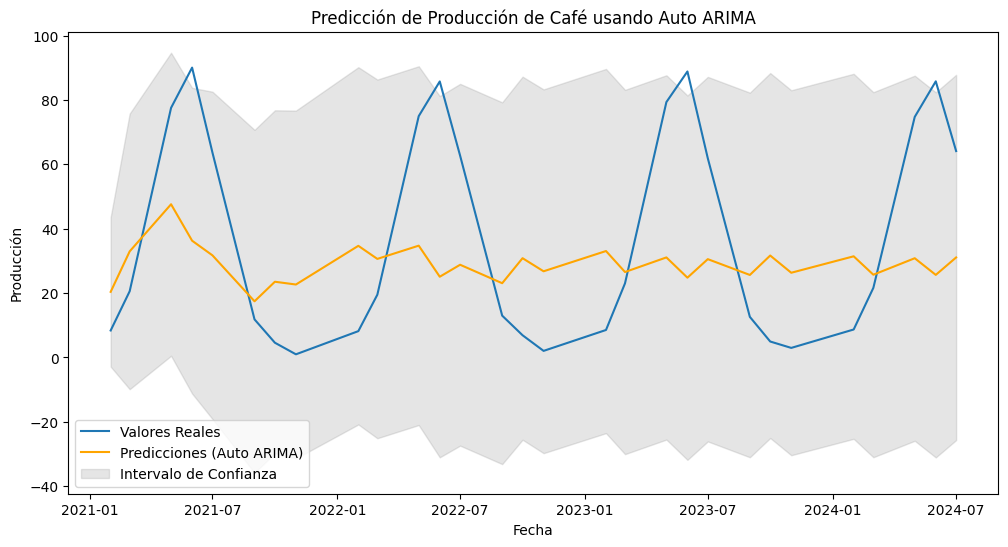

In [ ]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np

# Ruta del archivo subido
ruta_archivo = '/content/Cafe.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'Fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'Fecha' como índice
df.set_index('Fecha', inplace=True)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(df) * 0.8)
train_data = df['Producción'][:train_size]
test_data = df['Producción'][train_size:]

# Ajustar el modelo Auto ARIMA
model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Generar predicciones en el conjunto de prueba
n_periods = len(test_data)
predictions, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Calcular el error absoluto y la desviación estándar del error
errors = test_data.values - predictions
std_dev_error = np.std(errors)

# Calcular el Error Promedio Geométrico (EPG) y el Error Promedio Relativo (EPR)
epg = np.mean(np.abs(errors))
epr = np.mean(np.abs(errors / test_data.values))

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': test_data.index,
    'Producción Real': test_data.values,
    'Predicción': predictions,
    'Error Absoluto': errors,
    'Desviación Estándar del Error': [std_dev_error] * len(test_data),
    'EPG': [epg] * len(test_data),
    'EPR': [epr] * len(test_data),
    'Diferencia EPG - EPR': [epg - epr] * len(test_data)
})

# Agregar la columna de "Corroboración"
results_df['Corroboración'] = np.where(results_df['EPG'] > results_df['EPR'], 'SI', 'NO')

# Guardar la tabla de resultados en un archivo Excel (opcional)
results_df.to_excel('/content/Resultados_Predicciones_Cafe_AutoARIMA.xlsx', index=False)

# Mostrar la tabla de resultados
print(results_df)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Valores Reales')
plt.plot(test_data.index, predictions, label='Predicciones (Auto ARIMA)', color='orange')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Intervalo de Confianza')
plt.title("Predicción de Producción de Café usando Auto ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-3-1fb0c4aa631d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=future_periods + 1, freq='M')[1:]


         Fecha  Predicción  Límite Inferior  Límite Superior
112 2024-08-31   20.386306        -2.854045        43.626656
113 2024-09-30   32.956274        -9.851049        75.763598
114 2024-10-31   47.593858         0.521397        94.666319
115 2024-11-30   36.271308       -11.216689        83.759306
116 2024-12-31   31.724774       -19.108207        82.557754
117 2025-01-31   17.451710       -35.798174        70.701595
118 2025-02-28   23.527129       -29.726443        76.780700
119 2025-03-31   22.662363       -31.369727        76.694452
120 2025-04-30   34.683183       -20.808666        90.175032
121 2025-05-31   30.621028       -25.089114        86.331170
122 2025-06-30   34.735426       -20.989950        90.460801
123 2025-07-31   25.083796       -31.018081        81.185673


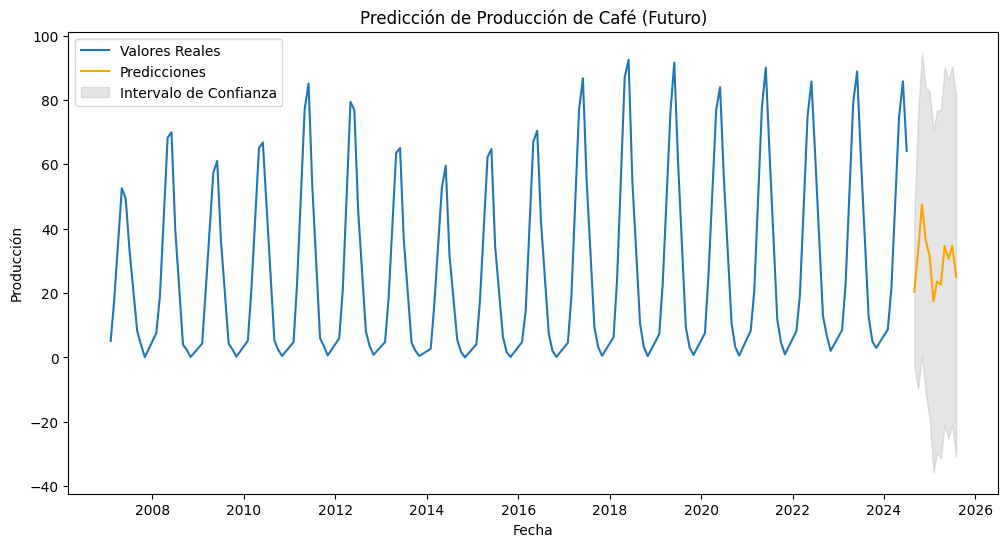

In [ ]:
# Generar predicciones futuras
future_periods = 12  # Número de períodos futuros a predecir
future_forecast, conf_int = model.predict(n_periods=future_periods, return_conf_int=True)

# Crear un DataFrame para las predicciones
forecast_index = pd.date_range(start=df.index[-1], periods=future_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({
    'Fecha': forecast_index,
    'Predicción': future_forecast,
    'Límite Inferior': conf_int[:, 0],
    'Límite Superior': conf_int[:, 1]
})

# Mostrar las predicciones futuras
print(forecast_df)

# Graficar las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Valores Reales')
plt.plot(forecast_index, future_forecast, label='Predicciones', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Intervalo de Confianza')
plt.title("Predicción de Producción de Café (Futuro)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()
